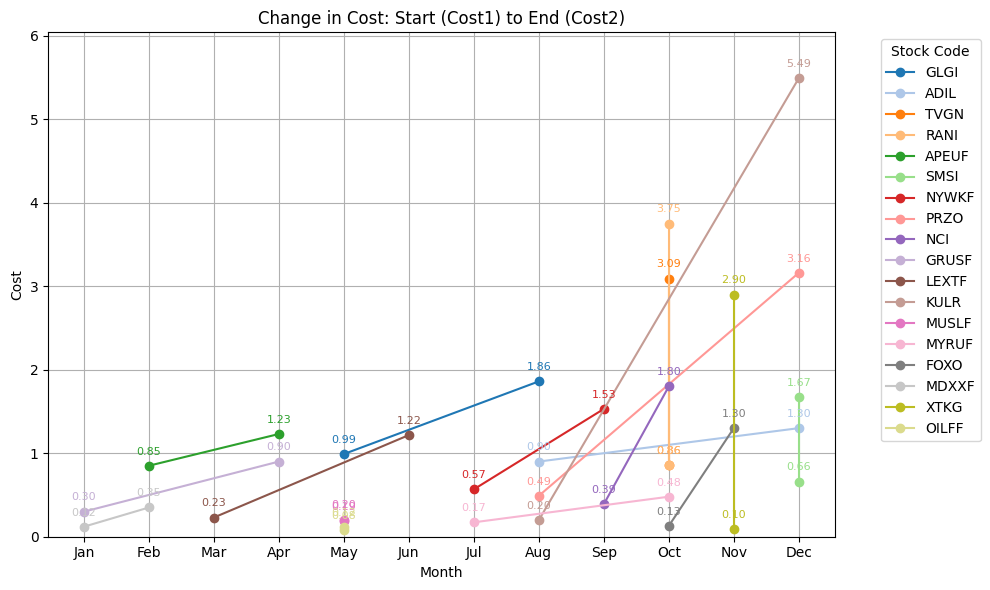

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# CSV content as a string
data = """GLGI,0.99000001,2024-05-15,1.86,2024-08-29
ADIL,0.89999998,2024-08-05,1.3,2024-12-04
TVGN,0.86000001,2024-10-15,3.09,2024-10-25
RANI,0.86000001,2024-10-15,3.75,2024-10-15
APEUF,0.85000002,2024-02-06,1.23,2024-04-22
SMSI,0.66000003,2024-12-05,1.67,2024-12-27
NYWKF,0.56760001,2024-07-26,1.53,2024-09-03
PRZO,0.49000001,2024-08-21,3.16,2024-12-27
NCI,0.38999999,2024-09-05,1.8,2024-10-21
GRUSF,0.30000001,2024-01-31,0.89999998,2024-04-30
LEXTF,0.23,2024-03-28,1.217,2024-06-20
KULR,0.2,2024-08-13,5.49,2024-12-27
MUSLF,0.1855,2024-05-16,0.205,2024-05-17
MYRUF,0.1724,2024-07-08,0.47915,2024-10-21
FOXO,0.13,2024-10-31,1.3,2024-11-12
MDXXF,0.12,2024-01-31,0.34999999,2024-02-05
XTKG,0.096000001,2024-11-01,2.9,2024-11-14
OILFF,0.076499999,2024-05-14,0.12,2024-05-29"""

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(data), header=None, 
                 names=["Code", "Cost1", "Date1", "Cost2", "Date2"])

# Convert the date strings to datetime objects
df["Date1"] = pd.to_datetime(df["Date1"])
df["Date2"] = pd.to_datetime(df["Date2"])

# Extract month numbers from the dates (1 = Jan, 12 = Dec)
df["Month1"] = df["Date1"].dt.month
df["Month2"] = df["Date2"].dt.month

# Determine the maximum end cost to set the y-axis upper limit
max_end_cost = df["Cost2"].max()

# Use a colormap to get distinct colors (tab20 provides up to 20 distinct colors)
colors = plt.get_cmap('tab20').colors

# Create the line graph with annotations
plt.figure(figsize=(10, 6))
for i, (_, row) in enumerate(df.iterrows()):
    color = colors[i % len(colors)]
    # Plot a line connecting the starting and ending points
    plt.plot([row["Month1"], row["Month2"]], [row["Cost1"], row["Cost2"]],
             marker='o', label=row["Code"], color=color)
    # Annotate the starting point with its cost
    plt.text(row["Month1"], row["Cost1"] + 0.02 * max_end_cost, f'{row["Cost1"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)
    # Annotate the ending point with its cost
    plt.text(row["Month2"], row["Cost2"] + 0.02 * max_end_cost, f'{row["Cost2"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Cost")
plt.title("Change in Cost: Start (Cost1) to End (Cost2)")
plt.ylim(0, max_end_cost * 1.1)  # y-axis from 0 to just above the highest end cost
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Add a legend with stock names; adjust bbox_to_anchor for clarity
plt.legend(title="Stock Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


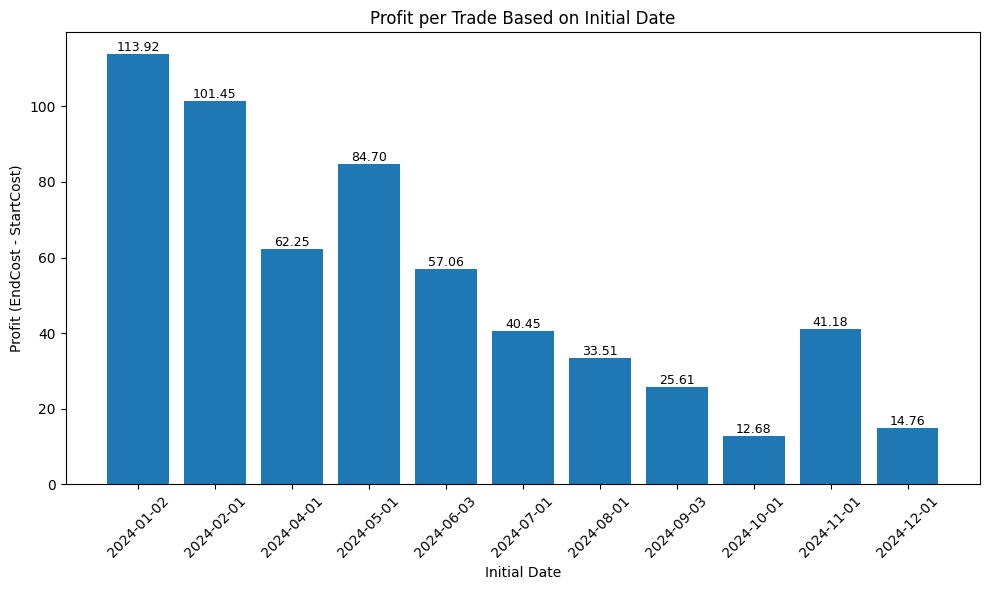

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# CSV content as a string
data = """SPY,2024-10-1,573.40002,2024-10-01,586.080017,2024-12-31
SPY,2024-12-1,571.32001,2024-11-01,586.080017,2024-12-31
SPY,2024-11-1,567.89001,2024-11-04,609.070007,2024-12-06
SPY,2024-09-3,560.46997,2024-09-03,586.080017,2024-12-31
SPY,2024-08-1,552.57001,2024-08-01,586.080017,2024-12-31
SPY,2024-07-1,545.63,2024-07-01,586.080017,2024-12-31
SPY,2024-06-3,529.02002,2024-06-03,586.080017,2024-12-31
SPY,2024-04-1,523.83002,2024-04-01,586.080017,2024-12-31
SPY,2024-05-1,501.38,2024-05-01,586.080017,2024-12-31
SPY,2024-02-1,484.63,2024-02-01,586.080017,2024-12-31
SPY,2024-01-2,472.16,2024-01-02,586.080017,2024-12-31"""

# Load the CSV content into a DataFrame and assign column names
df = pd.read_csv(StringIO(data), header=None, 
                 names=["Code", "InitialDate", "StartCost", "Date2", "EndCost", "Date3"])

# Convert the initial date column to datetime objects
df["InitialDate"] = pd.to_datetime(df["InitialDate"], format="%Y-%m-%d")

# Calculate profit as (EndCost - StartCost)
df["Profit"] = df["EndCost"] - df["StartCost"]

# Sort by the initial date for proper x-axis ordering
df.sort_values("InitialDate", inplace=True)

# Create a bar graph: x-axis uses the initial date (formatted as a string) and y-axis is the profit
plt.figure(figsize=(10, 6))
bars = plt.bar(df["InitialDate"].dt.strftime("%Y-%m-%d"), df["Profit"])

plt.xlabel("Initial Date")
plt.ylabel("Profit (EndCost - StartCost)")
plt.title("Profit per Trade Based on Initial Date")
plt.xticks(rotation=45)

# Annotate each bar with its profit value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

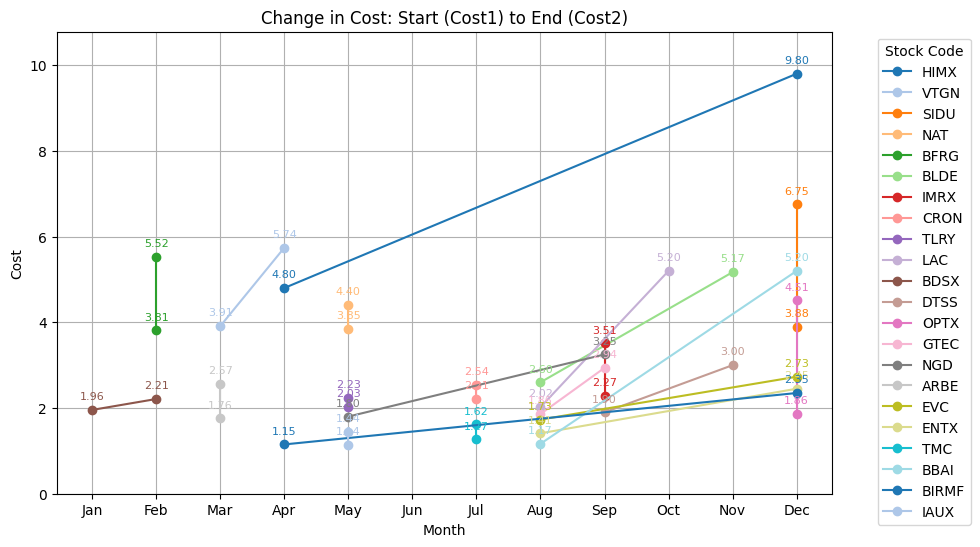

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# CSV content as a string
data = """HIMX,4.8,2024-04-19,9.8,2024-12-12
VTGN,3.91,2024-03-14,5.74,2024-04-04
SIDU,3.885,2024-12-20,6.75,2024-12-31
NAT,3.85,2024-05-01,4.4,2024-05-21
BFRG,3.81,2024-02-23,5.52,2024-02-27
BLDE,2.6,2024-08-05,5.17,2024-11-29
IMRX,2.275,2024-09-19,3.51,2024-09-20
CRON,2.21,2024-07-05,2.54,2024-07-23
TLRY,2.03,2024-05-15,2.23,2024-05-16
LAC,2.02,2024-08-05,5.2,2024-10-29
BDSX,1.955,2024-01-26,2.21,2024-02-05
DTSS,1.9,2024-09-24,3.0,2024-11-19
OPTX,1.86,2024-12-20,4.51,2024-12-27
GTEC,1.86,2024-08-29,2.937,2024-09-13
NGD,1.8,2024-05-15,3.25,2024-09-25
ARBE,1.76,2024-03-20,2.57,2024-03-22
EVC,1.73,2024-08-14,2.73,2024-12-18
ENTX,1.41,2024-08-05,2.45,2024-12-10
TMC,1.27,2024-07-02,1.62,2024-07-08
BBAI,1.165,2024-08-05,5.2,2024-12-31
BIRMF,1.15,2024-04-18,2.35,2024-12-26
IAUX,1.14,2024-05-14,1.44,2024-05-20"""

# Load the CSV content into a DataFrame and assign column names
df = pd.read_csv(StringIO(data), header=None, 
                 names=["Code", "Cost1", "Date1", "Cost2", "Date2"])

# Convert the date strings to datetime objects
df["Date1"] = pd.to_datetime(df["Date1"])
df["Date2"] = pd.to_datetime(df["Date2"])

# Extract month numbers from the dates (1 = Jan, 12 = Dec)
df["Month1"] = df["Date1"].dt.month
df["Month2"] = df["Date2"].dt.month

# Determine the maximum end cost to set the y-axis upper limit
max_end_cost = df["Cost2"].max()

# Use a colormap to get distinct colors (tab20 provides up to 20 distinct colors)
colors = plt.get_cmap('tab20').colors

# Create the line graph with annotations for each point
plt.figure(figsize=(10, 6))
for i, (_, row) in enumerate(df.iterrows()):
    color = colors[i % len(colors)]
    # Plot a line connecting the starting and ending points
    plt.plot([row["Month1"], row["Month2"]], [row["Cost1"], row["Cost2"]],
             marker='o', label=row["Code"], color=color)
    # Annotate the starting point with its cost
    plt.text(row["Month1"], row["Cost1"] + 0.02 * max_end_cost, f'{row["Cost1"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)
    # Annotate the ending point with its cost
    plt.text(row["Month2"], row["Cost2"] + 0.02 * max_end_cost, f'{row["Cost2"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Cost")
plt.title("Change in Cost: Start (Cost1) to End (Cost2)")
plt.ylim(0, max_end_cost * 1.1)  # y-axis from 0 to just above the highest end cost
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title="Stock Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


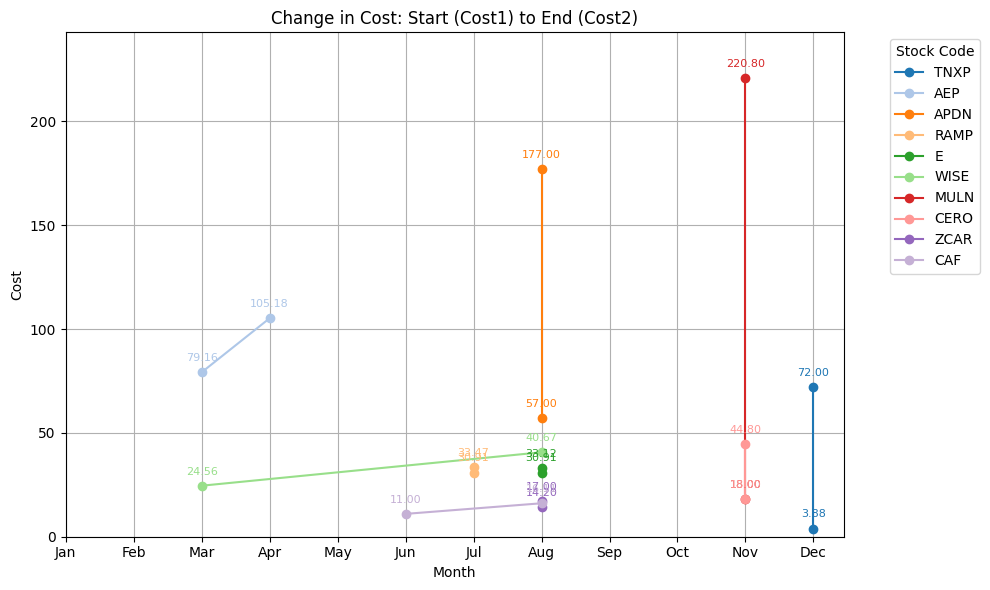

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# CSV content as a string
data = """TNXP,2024-12-19,3.885,2024-12-20,72.0,2024-12-19
AEP,2024-03-18,79.16,2024-04-16,105.18,2024-09-16
APDN,2024-08-20,57.0,2024-08-21,177.0,2024-08-23
RAMP,2024-07-4,30.91,2024-07-10,33.47,2024-07-16
E,2024-08-8,30.91,2024-08-08,33.12,2024-08-26
WISE,2024-03-18,24.56,2024-08-05,40.669,2024-12-26
MULN,2024-11-14,18.0,2024-11-14,220.8,2024-11-14
CERO,2024-11-14,18.0,2024-11-14,44.8,2024-11-15
ZCAR,2024-08-20,14.2,2024-08-22,17.0,2024-08-23
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07"""

# Load the CSV content into a DataFrame and assign column names
df = pd.read_csv(StringIO(data), header=None, 
                 names=["Code", "Date1", "Cost1", "Date2", "Cost2", "Date3"])

# Convert Date1 and Date2 to datetime objects
df["Date1"] = pd.to_datetime(df["Date1"])
df["Date2"] = pd.to_datetime(df["Date2"])

# Extract month numbers (1 to 12) from Date1 and Date2 for the x-axis
df["Month1"] = df["Date1"].dt.month
df["Month2"] = df["Date2"].dt.month

# Determine the maximum cost (for y-axis scaling)
max_cost = df["Cost2"].max()

# Use a colormap to assign distinct colors (tab20 provides up to 20 colors)
colors = plt.get_cmap('tab20').colors

# Create the line graph with annotations
plt.figure(figsize=(10, 6))
for i, (_, row) in enumerate(df.iterrows()):
    color = colors[i % len(colors)]
    # Plot a line connecting the starting and ending points
    plt.plot([row["Month1"], row["Month2"]], [row["Cost1"], row["Cost2"]],
             marker='o', label=row["Code"], color=color)
    # Annotate the starting point with its cost value
    plt.text(row["Month1"], row["Cost1"] + 0.02 * max_cost, f'{row["Cost1"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)
    # Annotate the ending point with its cost value
    plt.text(row["Month2"], row["Cost2"] + 0.02 * max_cost, f'{row["Cost2"]:.2f}',
             ha='center', va='bottom', fontsize=8, color=color)

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Cost")
plt.title("Change in Cost: Start (Cost1) to End (Cost2)")
plt.ylim(0, max_cost * 1.1)  # y-axis from 0 to just above the highest cost
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title="Stock Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1.now that we have all the increases
makea  script that shows the relative increase of stocks investment 

lets say 25 bucks for each stock in each month 
then divide and calc the return 

2.now do the same but for spy taking in the exact same investment each month but into spy instead and calculate 

3.now compare 

4.then look up each stocks date and day closing and the day after closing price to compare

5.then save all the plots and start writing

so first we will take in all of the possible data types
Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
________________________________________________________________________________________________________
ticker = stock
researched date = group by the month
lowest price = buy cost
lowest date = buy date
highest price = profit amount
highest date = sold date
day after price = how much u could have lost 
day after date = sold date +1
________________________________________________________________________________________________________
Take the stock price and divide it by 25
----------------------------------------------
shares = 25/lowest date
shares * lowest price = investment_cost 
shares * highest price = investment_gain
shares * Day_After_Price = investment_day_after_gain
________________________________________________________________________________________________________
Bar graph calc
----------------------------------------------
investment_gain - investment_cost = Max_Profit (If u hit)
investment_day_after_gain - investment_cost = Day After Profit (If u miss)
Day After Profit - Max Profit = Missed Potential Profit (Q_Q)
________________________________________________________________________________________________________
multiple bar graphs
----------------------------------------------
amount of investment each month 
the investment gain at max profit
the day after profit for each penny stock
spy stock price gain after equal investment in penny stocks end of the year
----------------------------------------------
so each stock will show max profit post investment of the month 
then a portfolio line of each investment buy, sell 










0     260.416664
1      12.787724
2       6.393862
3     192.307692
4       5.208333
5      21.459227
6       6.561680
7      51.020407
8      14.204545
9       0.315816
10      1.017915
11     14.450867
12     25.252525
13     21.929825
14     12.376238
15      6.493506
16     13.888889
17      0.113225
18     19.685039
19     12.315271
20     11.312217
21     17.730496
22      9.615385
23     27.777778
24      0.438596
25     13.440860
26      0.088028
27     37.878786
28     13.157895
29     10.989011
30     29.069767
31     19.230769
32      1.388889
33     13.440860
34      6.435006
35      0.620347
36     83.333331
37    208.333333
38     29.411764
39    108.695652
40    326.797390
41      0.023621
42     21.739130
43    125.000000
44      0.289855
45    134.770889
46     44.045101
47      2.272727
48      0.808800
49    145.011601
50      0.808800
51     64.102566
Name: Shares, dtype: float64
0     755.208325
1      28.260870
2      36.700767
3     250.000000
4      51.041667
5 

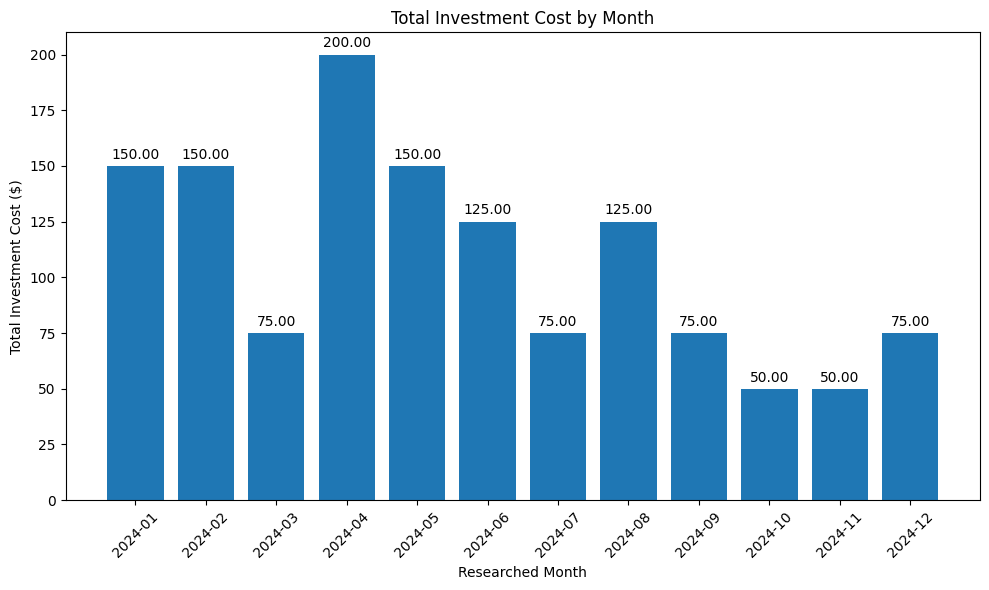

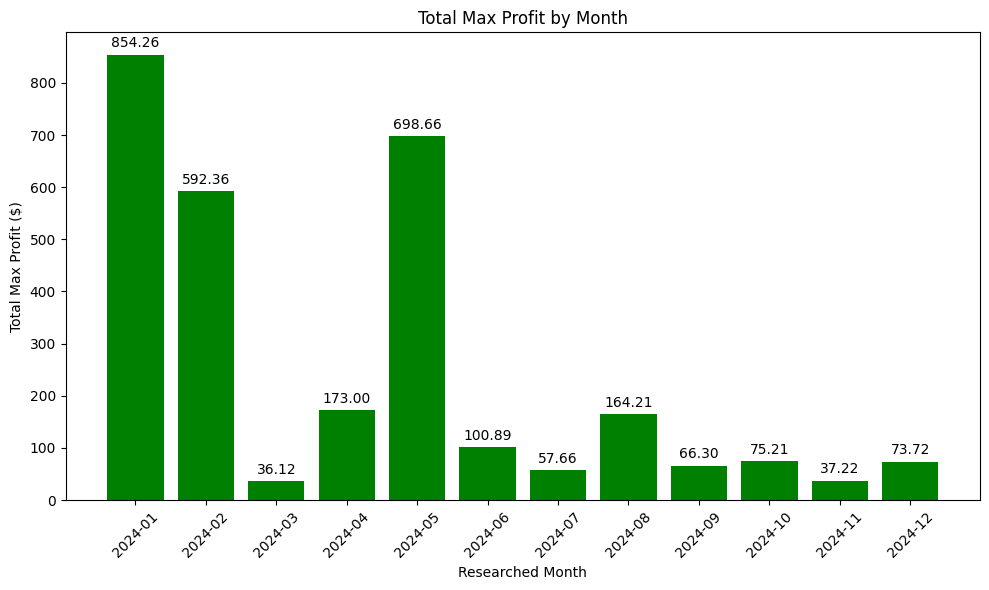

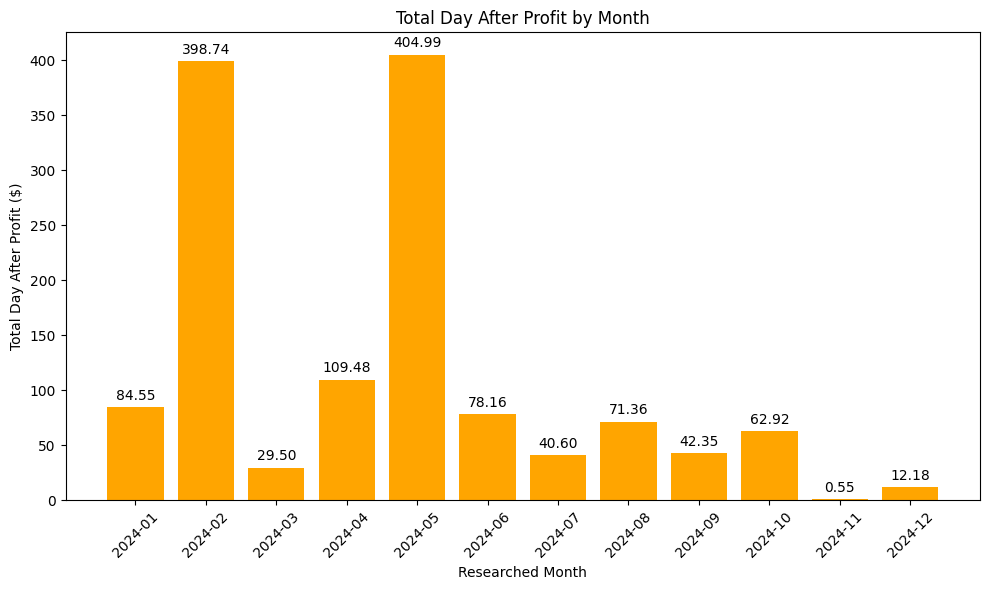

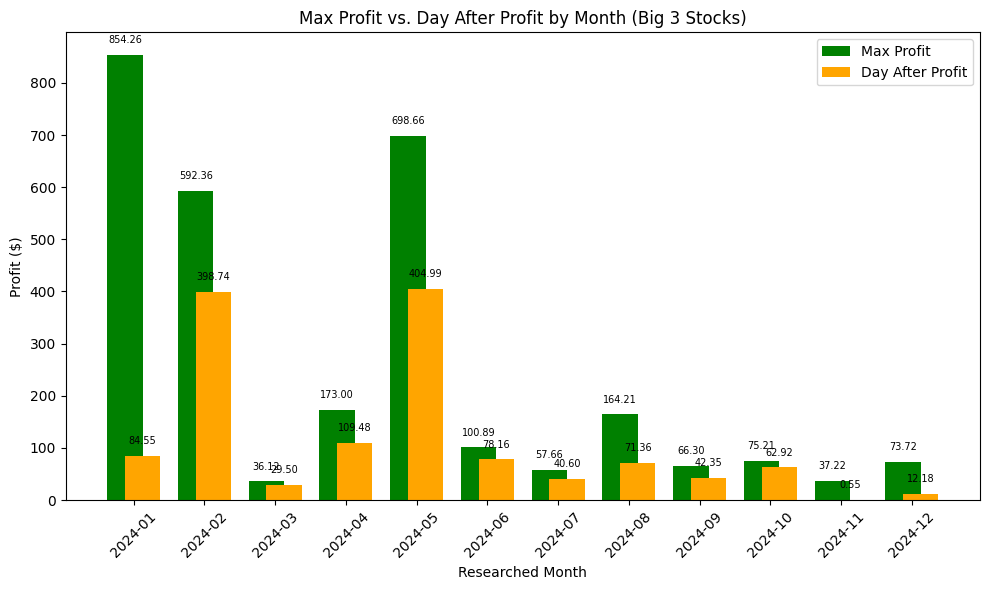

Detailed Data:
       Ticker Researched_Date  Lowest_Price Lowest_Date  Highest_Price  \
0        XTKG      2024-01-26       0.09600  2024-11-01        2.90000   
1        BDSX      2024-01-26       1.95500  2024-01-26        2.21000   
2        VTGN      2024-01-26       3.91000  2024-03-14        5.74000   
3        FOXO      2024-02-23       0.13000  2024-10-31        1.30000   
4        HIMX      2024-02-23       4.80000  2024-04-19        9.80000   
5        BBAI      2024-02-23       1.16500  2024-08-05        5.20000   
6        BFRG      2024-02-23       3.81000  2024-02-23        5.52000   
7        PRZO      2024-02-23       0.49000  2024-08-21        3.16000   
8        ARBE      2024-03-18       1.76000  2024-03-20        2.57000   
9         AEP      2024-03-18      79.16000  2024-04-16      105.18000   
10       WISE      2024-03-18      24.56000  2024-08-05       40.66900   
11        EVC      2024-04-28       1.73000  2024-08-14        2.73000   
12       GLGI      2024

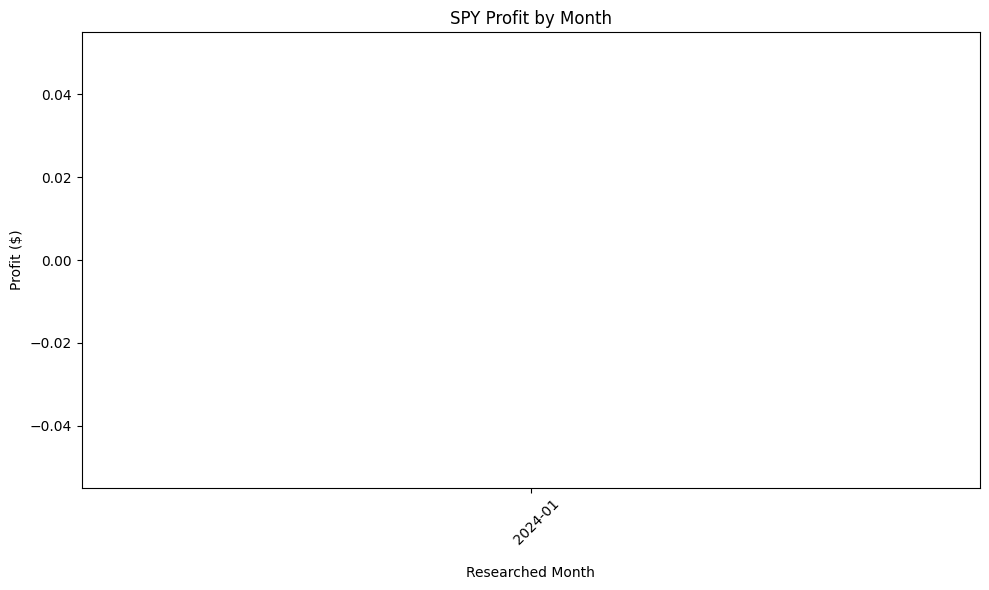

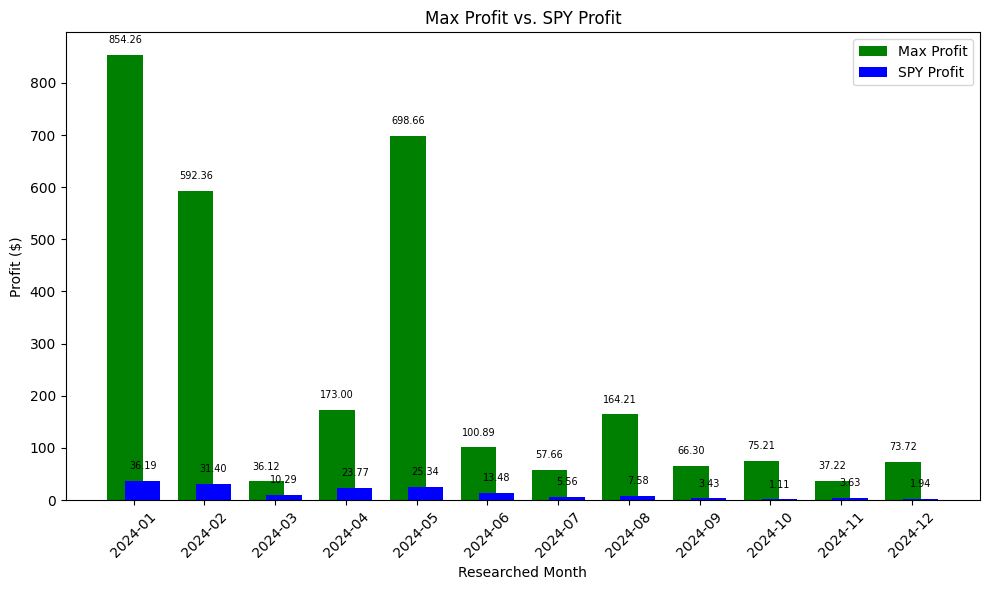

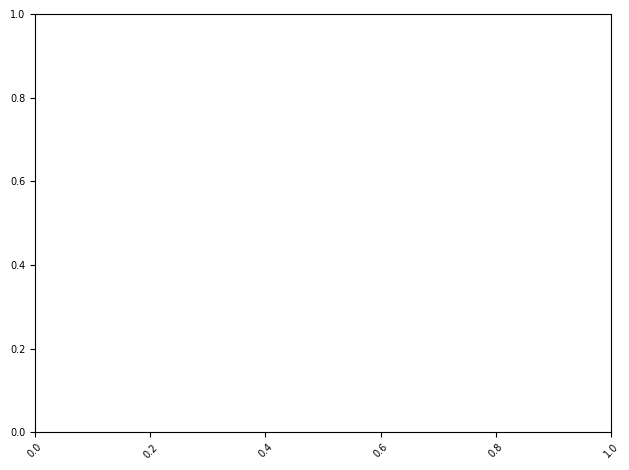

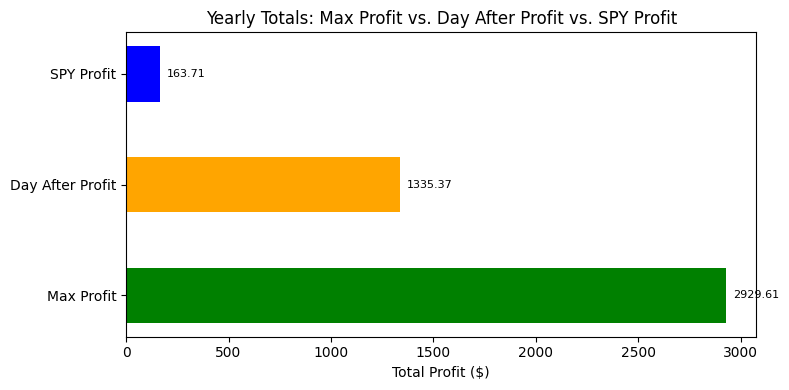

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

class testedisabfdsset:
    # --- Step 1: Load Data ---
    data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
    XTKG,2024-01-26,0.096000001,2024-11-01,2.9,2024-11-14,0.127,2024-11-15
    BDSX,2024-01-26,1.955,2024-01-26,2.21,2024-02-05,2.02,2024-02-06
    VTGN,2024-01-26,3.91,2024-03-14,5.74,2024-04-04,5.04,2024-04-05
    FOXO,2024-02-23,0.13,2024-10-31,1.3,2024-11-12,0.92000002,2024-11-13
    HIMX,2024-02-23,4.8,2024-04-19,9.8,2024-12-12,8.59,2024-12-13
    BBAI,2024-02-23,1.165,2024-08-05,5.2,2024-12-31,4.52,2025-01-02
    BFRG,2024-02-23,3.81,2024-02-23,5.52,2024-02-27,4.645,2024-02-28
    PRZO,2024-02-23,0.49000001,2024-08-21,3.16,2024-12-27,2.44,2024-12-30
    ARBE,2024-03-18,1.76,2024-03-20,2.57,2024-03-22,2.19,2024-03-26
    AEP,2024-03-18,79.16,2024-04-16,105.18,2024-09-16,104.21,2024-09-17
    WISE,2024-03-18,24.56,2024-08-05,40.669,2024-12-26,39.77,2024-12-27
    EVC,2024-04-28,1.73,2024-08-14,2.73,2024-12-18,2.46,2024-12-19
    GLGI,2024-04-28,0.99000001,2024-05-15,1.86,2024-08-29,1.57,2024-08-30
    IAUX,2024-04-28,1.14,2024-05-14,1.44,2024-05-20,1.22,2024-05-21
    LAC,2024-04-28,2.02,2024-08-05,5.2,2024-10-29,4.11,2024-10-30
    NAT,2024-04-28,3.85,2024-05-01,4.4,2024-05-21,4.28,2024-05-22
    NGD,2024-05-15,1.8,2024-05-15,3.25,2024-09-25,3.11,2024-09-26
    MULN,2024-11-14,220.8,2024-11-14,220.8,2024-11-14,152.4,2024-11-15
    TMC,2024-05-15,1.27,2024-07-02,1.62,2024-07-08,1.49,2024-07-09
    TLRY,2024-05-15,2.03,2024-05-15,2.23,2024-05-16,1.98,2024-05-17
    CRON,2024-06-17,2.21,2024-07-05,2.54,2024-07-23,2.37,2024-07-24
    ENTX,2024-06-17,1.41,2024-08-05,2.45,2024-12-10,2.24,2024-12-11
    BLDE,2024-06-17,2.6,2024-08-05,5.17,2024-11-29,4.46,2024-12-02
    ADIL,2024-07-25,0.89999998,2024-08-05,1.3,2024-12-04,1.15,2024-12-05
    APDN,2024-08-20,57.0,2024-08-21,177.0,2024-08-23,110.00,2024-08-26
    GTEC,2024-08-20,1.86,2024-08-29,2.937,2024-09-13,2.77,2024-09-16
    ZCAR,2024-08-20,284.0,2024-08-22,340.0,2024-08-23,315.00,2024-08-26
    SMSI,2024-09-18,0.66000003,2024-12-05,1.67,2024-12-27,1.39,2024-12-30
    DTSS,2024-09-18,1.9,2024-09-24,3.0,2024-11-19,2.52,2024-11-20
    IMRX,2024-09-18,2.275,2024-09-19,3.51,2024-09-20,2.87,2024-09-21
    TVGN,2024-10-15,0.86000001,2024-10-15,3.09,2024-10-25,2.74,2024-10-28
    RANI,2024-10-15,1.30,2024-12-19,1.84,2025-02-14,1.73,2025-02-15
    CERO,2024-11-14,18.0,2024-11-14,44.8,2024-11-15,23.97,2024-11-18
    OPTX,2024-12-19,1.86,2024-12-20,4.51,2024-12-27,2.52,2024-12-31
    SIDU,2024-12-19,3.885,2024-12-20,6.75,2024-12-31,3.05,2025-01-02
    TNXP,2024-12-19,40.30,2024-12-19,72.0,2024-12-19,54.30,2024-12-20
    GRUSF,2024-01-27,0.30000001,2024-01-31,0.89999998,2024-04-30,0.70999998,2024-05-01
    MDXXF,2024-01-27,0.12,2024-01-31,0.34999999,2024-02-05,0.235,2024-02-06
    APEUF,2024-01-27,0.85000002,2024-02-06,1.23,2024-04-22,1.2,2024-04-23
    LEXTF,2024-02-26,0.23,2024-03-28,1.217,2024-06-20,0.69099998,2024-06-21
    OILFF,2024-04-18,0.076499999,2024-05-14,0.12,2024-05-29,0.094300002,2024-05-30
    WHLR,2024-04-18,1058.40002,2024-06-11,3038.3999,2024-06-13,2016.0,2024-06-14
    BIRMF,2024-04-18,1.15,2024-04-18,2.35,2024-12-26,2.32,2024-12-27
    KULR,2024-05-16,0.2,2024-08-13,5.49,2024-12-27,3.55,2024-12-30
    JAGX,2024-05-16,86.25,2024-06-03,104.50,2024-06-22,40.50,2024-06-23
    MUSLF,2024-05-16,0.1855,2024-05-16,0.205,2024-05-17,0.01923,2024-05-20
    NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.39,2024-09-04
    CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,14.31,2024-10-08
    RAMP,2024-07-4,30.91,2024-07-10,33.47,2024-07-16,32.16,2024-07-17
    MYRUF,2024-07-4,0.1724,2024-07-08,0.47915,2024-10-21,0.39750001,2024-10-22
    E,2024-08-8,30.91,2024-08-08,33.12,2024-08-26,32.75,2024-08-27
    NCI,2024-08-8,0.38999999,2024-09-05,1.8,2024-10-21,0.884,2024-10-22
    """

    # Read the CSV data into a DataFrame
    df = pd.read_csv(StringIO(data), parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date", "Day_After_Date"])

    # --- Step 2: Mapping & Calculations ---
    # Calculate the number of shares bought with $25 investment
    df["Shares"] = 25 / df["Lowest_Price"]
    print (df["Shares"])
    # Investment cost (always $25 per stock)
    df["Investment_Cost"] = df["Shares"] * df["Lowest_Price"]

    # Investment gain if the high is hit
    df["Investment_Gain"] = df["Shares"] * df["Highest_Price"]

    # Investment gain if the day after price is taken (i.e., if you miss the high)
    df["Investment_Day_After_Gain"] = df["Shares"] * df["Day_After_Price"]

    # --- Step 3: Calculate Profit Metrics ---
    df["Max_Profit"] = df["Investment_Gain"] - df["Investment_Cost"]
    print(df["Investment_Gain"])
    df["Day_After_Profit"] = df["Investment_Day_After_Gain"] - df["Investment_Cost"]
    df["Missed_Potential_Profit"] = df["Day_After_Profit"] - df["Max_Profit"]

    # Create a month column from Researched_Date for grouping (format YYYY-MM)
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')

    # --- Step 4: Group by Month ---
    monthly = df.groupby("Researched_Month").agg({
        "Investment_Cost": "sum",
        "Investment_Gain": "sum",
        "Investment_Day_After_Gain": "sum",
        "Max_Profit": "sum",
        "Day_After_Profit": "sum",
        "Missed_Potential_Profit": "sum"
    }).reset_index()

    # --- Step 5: Plotting Bar Graphs with Annotations ---

    # Graph 1: Total Investment Each Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Investment_Cost"])
    plt.title("Total Investment Cost by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Investment Cost ($)")
    plt.xticks(rotation=45)
    # Add numbers on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Graph 2: Total Max Profit by Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Max_Profit"], color='green')
    plt.title("Total Max Profit by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Max Profit ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Graph 3: Total Day After Profit by Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Day_After_Profit"], color='orange')
    plt.title("Total Day After Profit by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Day After Profit ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Graph 4: Comparison of Max Profit vs. Day After Profit per Month
    plt.figure(figsize=(10, 6))
    bar_width = 0.50
    x = range(len(monthly["Researched_Month"]))
    bar_width = 0.50
    bars1 = plt.bar([p - bar_width/2 for p in x], monthly["Max_Profit"], width=bar_width, label="Max Profit", color='green')
    bar_width = 0.50

    bars2 = plt.bar([p + bar_width/2 for p in x], monthly["Day_After_Profit"], width=bar_width, label="Day After Profit", color='orange')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. Day After Profit by Month (Big 3 Stocks)")
    plt.xticks(x, monthly["Researched_Month"], rotation=45)
    plt.legend()

    # Annotate bars for Max Profit
    for bar in bars1:
        height = bar.get_height()
        # If bar is positive, place text above; if negative, place below
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )

    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )

    plt.tight_layout()
    plt.show()

    # Display the DataFrame with calculated columns (optional)
    print("Detailed Data:")
    print(df.head(99))
    print("\nMonthly Aggregates:")
    print(monthly)

    # --- Step 1: Monthly Investment Data ---
    data_monthly = """Researched_Month,Investment_Cost,Investment_Gain
    2024-01,150.0,1004.263092
    2024-02,150.0,742.357217
    2024-03,75.0,111.120814
    2024-04,200.0,372.998722
    2024-05,150.0,848.659594
    2024-06,125.0,225.886928
    2024-07,75.0,132.663948
    2024-08,125.0,289.209029
    2024-09,75.0,141.302686
    2024-10,50.0,125.210196
    2024-11,50.0,87.222222
    2024-12,75.0,148.719585
    """
    # Only use Researched_Month and Investment_Cost columns (ignore Investment_Gain)
    monthly_df = pd.read_csv(StringIO(data_monthly), usecols=["Researched_Month", "Investment_Cost"])

    # --- Step 2: SPY Data ---
    spy_data = """SPY,2024-10-1,573.40002,2024-10-01,586.080017,2024-12-31
    SPY,2024-12-1,571.32001,2024-11-01,586.080017,2024-12-31
    SPY,2024-11-1,567.89001,2024-11-04,609.070007,2024-12-06
    SPY,2024-09-3,560.46997,2024-09-03,586.080017,2024-12-31
    SPY,2024-08-1,552.57001,2024-08-01,586.080017,2024-12-31
    SPY,2024-07-1,545.63,2024-07-01,586.080017,2024-12-31
    SPY,2024-06-3,529.02002,2024-06-03,586.080017,2024-12-31
    SPY,2024-04-1,523.83002,2024-04-01,586.080017,2024-12-31
    SPY,2024-05-1,501.38,2024-05-01,586.080017,2024-12-31
    SPY,2024-03-1,515.38,2024-05-01,586.080017,2024-12-31
    SPY,2024-02-1,484.63,2024-02-01,586.080017,2024-12-31
    SPY,2024-01-2,472.16,2024-01-02,586.080017,2024-12-31"""

    # Define column names for the SPY data
    spy_columns = ["Ticker", "Researched_Date", "Buy_Price", "Buy_Date", "Sell_Price", "Sell_Date"]

    # Read the SPY data into a DataFrame and parse the date columns
    spy_df = pd.read_csv(StringIO(spy_data), header=None, names=spy_columns,
                        parse_dates=["Researched_Date", "Buy_Date", "Sell_Date"])

    # Create a Researched_Month column in the format YYYY-MM for merging
    spy_df["Researched_Month"] = spy_df["Researched_Date"].dt.strftime('%Y-%m')

    # Sort the SPY DataFrame by Researched_Date (so earlier months come first)
    spy_df = spy_df.sort_values(by="Researched_Date")

    # --- Step 3: Merge Monthly Investment Data with SPY Data ---
    # Merge on Researched_Month (left join so that every monthly investment is included)
    merged_df = pd.merge(monthly_df, spy_df, on="Researched_Month", how="left")
    print (merged_df["Investment_Cost"])
    # --- Step 4: Calculate SPY Shares and Profit ---
    # Calculate the number of SPY shares bought with Investment_Cost at the SPY buy price
    merged_df["SPY_Shares"] = merged_df["Investment_Cost"] / merged_df["Buy_Price"]

    # Calculate the final value of the SPY investment using the sell price
    merged_df["SPY_Final_Value"] = merged_df["SPY_Shares"] * merged_df["Sell_Price"]

    # Calculate the profit as the difference between the final value and the initial investment
    merged_df["SPY_Profit"] = merged_df["SPY_Final_Value"] - merged_df["Investment_Cost"]

    # Sort by month (optional, ensures proper order)
    merged_df = merged_df.sort_values("Researched_Month")

    # --- Step 5: Create Bar Graph with Profit Annotations ---
    plt.figure(figsize=(10,6))
    bars = plt.bar(merged_df["Researched_Month"], merged_df["SPY_Profit"], color='blue')
    plt.title("SPY Profit by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.xticks(rotation=45)

    # Annotate each bar with the profit value (formatted to 2 decimal places)
    for bar in bars:
        height = bar.get_height()
        # If bar is positive, place text above; if negative, place below
        if height >= 0:
            offset = 5
            va = 'bottom'
        else:
            offset = -5
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )
    plt.tight_layout()
    plt.show()

    # Compute monthly values from the original data (including Max_Profit)
    monthly_with_profit = df.groupby("Researched_Month").agg({
        "Investment_Cost": "sum",
        "Investment_Gain": "sum"
    }).reset_index()
    monthly_with_profit["Max_Profit"] = monthly_with_profit["Investment_Gain"] - monthly_with_profit["Investment_Cost"]

    # Now merge monthly_with_profit with your SPY data based on Researched_Month
    merged_df = pd.merge(monthly_with_profit, spy_df, on="Researched_Month", how="left")

    # Then calculate SPY shares, final value, and SPY profit as before:
    merged_df["SPY_Shares"] = merged_df["Investment_Cost"] / merged_df["Buy_Price"]
    merged_df["SPY_Final_Value"] = merged_df["SPY_Shares"] * merged_df["Sell_Price"]
    merged_df["SPY_Profit"] = merged_df["SPY_Final_Value"] - merged_df["Investment_Cost"]

    # Now you can plot both Max_Profit and SPY_Profit
    import matplotlib.pyplot as plt

    bar_width = 0.50
    x = range(len(merged_df["Researched_Month"]))

    plt.figure(figsize=(10, 6))
    bars1 = plt.bar([p - bar_width/2 for p in x], merged_df["Max_Profit"], width=bar_width, label="Max Profit", color='green')
    bars2 = plt.bar([p + bar_width/2 for p in x], merged_df["SPY_Profit"], width=bar_width, label="SPY Profit", color='blue')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. SPY Profit")
    plt.xticks(x, merged_df["Researched_Month"], rotation=45)
    plt.legend()
    for bar in bars1:
        height = bar.get_height()
        # If bar is positive, place text above; if negative, place below
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )

    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )

    plt.tight_layout()
    plt.show()
    # Now move these lines OUTSIDE the for loop
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()
    # --- Compute Yearly Totals ---

    # Using the monthly DataFrame 'monthly' (from Step 4) for the Max and Day After Profit:
    total_max_profit = monthly["Max_Profit"].sum()
    total_day_after_profit = monthly["Day_After_Profit"].sum()

    # Using the merged SPY DataFrame from the second merge block for SPY Profit:
    total_spy_profit = merged_df["SPY_Profit"].sum()

    # Categories and their corresponding total values
    categories = ["Max Profit", "Day After Profit", "SPY Profit"]
    values = [total_max_profit, total_day_after_profit, total_spy_profit]

    # --- Create a Horizontal Bar Graph ---

    plt.figure(figsize=(8, 4))
    bars = plt.barh(range(len(categories)), values, height=0.5, color=['green', 'orange', 'blue'])
    plt.yticks(range(len(categories)), categories, fontsize=10)
    plt.xlabel("Total Profit ($)", fontsize=10)
    plt.title("Yearly Totals: Max Profit vs. Day After Profit vs. SPY Profit", fontsize=12)

    # Annotate each horizontal bar with the profit value.
    # For horizontal bars, we adjust the x offset.
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y()
        height = bar.get_height()
        # If the value is positive, place the text to the right; if negative, to the left.
        if width >= 0:
            offset = 5
            ha = 'left'
        else:
            offset = -5
            ha = 'right'
        
        plt.annotate(
            f'{width:.2f}',
            xy=(width, y + height/2),
            xytext=(offset, 0),
            textcoords='offset points',
            ha=ha,
            va='center',
            fontsize=8
        )

    plt.tight_layout()
    plt.show()



add a comparision to spy stock whole number bar graph to profit total and day after

XTCG SSMI 
FOXO PRZO
KULR

ok now we need to do analysis on the average time for a stock to be researched and sold vs bought and sold. 

Raw counts by time difference:
      number  first_count  second_count  third_count
0     0 days         29.0           4.0          4.0
1     1 days          6.0           6.0         10.0
2     2 days          6.0           1.0          4.0
3     3 days          2.0           7.0          7.0
4     4 days          5.0           4.0          2.0
..       ...          ...           ...          ...
112 293 days          0.0           2.0          0.0
113 304 days          0.0           1.0          0.0
114 305 days          0.0           1.0          0.0
115 308 days          0.0           1.0          0.0
116 312 days          0.0           1.0          0.0

[117 rows x 4 columns]

Grouped counts (14-day bins):
    14_day_bin  first_count  second_count  third_count
0            0         56.0          37.0         45.0
1           14          8.0           7.0         11.0
2           28          5.0           6.0          6.0
3           42          9.0           4.0          4.0
4  

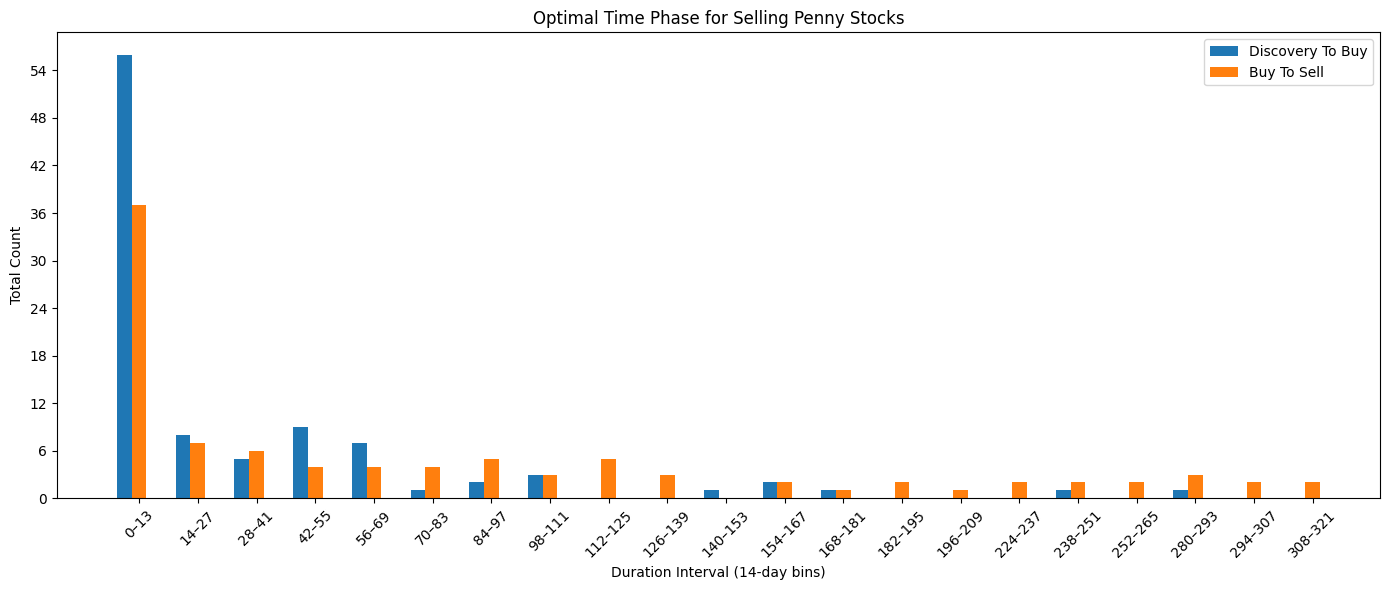

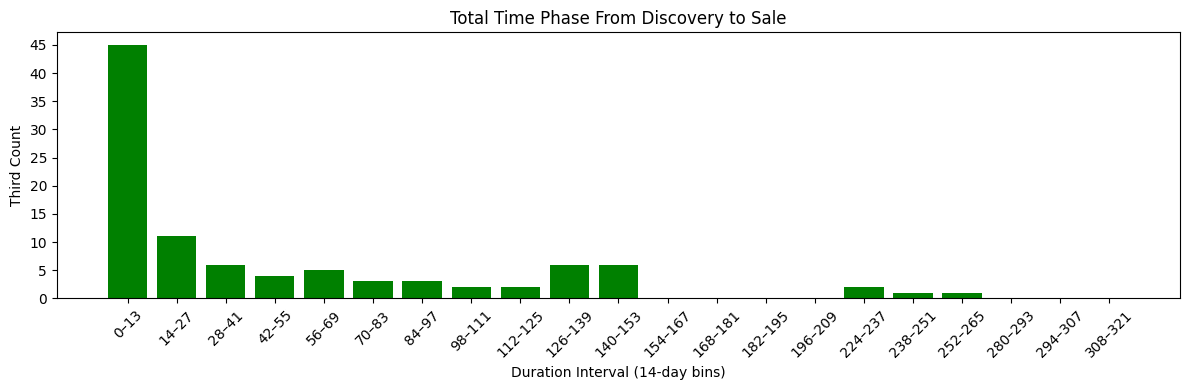

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import timedelta
import matplotlib.ticker as ticker

# Original data string with duplicate headers
data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
XTKG,2024-01-26,0.096000001,2024-11-01,2.9,2024-11-14,0.127,2024-11-15
BDSX,2024-01-26,1.955,2024-01-26,2.21,2024-02-05,2.02,2024-02-06
VTGN,2024-01-26,3.91,2024-03-14,5.74,2024-04-04,5.04,2024-04-05
FOXO,2024-02-23,0.13,2024-10-31,1.3,2024-11-12,0.92000002,2024-11-13
HIMX,2024-02-23,4.8,2024-04-19,9.8,2024-12-12,8.59,2024-12-13
BBAI,2024-02-23,1.165,2024-08-05,5.2,2024-12-31,4.52,2025-01-02
BFRG,2024-02-23,3.81,2024-02-23,5.52,2024-02-27,4.645,2024-02-28
PRZO,2024-02-23,0.49000001,2024-08-21,3.16,2024-12-27,2.44,2024-12-30
ARBE,2024-03-18,1.76,2024-03-20,2.57,2024-03-22,2.19,2024-03-26
AEP,2024-03-18,79.16,2024-04-16,105.18,2024-09-16,104.21,2024-09-17
WISE,2024-03-18,24.56,2024-08-05,40.669,2024-12-26,39.77,2024-12-27
EVC,2024-04-28,1.73,2024-08-14,2.73,2024-12-18,2.46,2024-12-19
GLGI,2024-04-28,0.99000001,2024-05-15,1.86,2024-08-29,1.57,2024-08-30
IAUX,2024-04-28,1.14,2024-05-14,1.44,2024-05-20,1.22,2024-05-21
LAC,2024-04-28,2.02,2024-08-05,5.2,2024-10-29,4.11,2024-10-30
NAT,2024-04-28,3.85,2024-05-01,4.4,2024-05-21,4.28,2024-05-22
NGD,2024-05-15,1.8,2024-05-15,3.25,2024-09-25,3.11,2024-09-26
MULN,2024-11-14,220.8,2024-11-14,220.8,2024-11-14,152.4,2024-11-15
TMC,2024-05-15,1.27,2024-07-02,1.62,2024-07-08,1.49,2024-07-09
TLRY,2024-05-15,2.03,2024-05-15,2.23,2024-05-16,1.98,2024-05-17
CRON,2024-06-17,2.21,2024-07-05,2.54,2024-07-23,2.37,2024-07-24
ENTX,2024-06-17,1.41,2024-08-05,2.45,2024-12-10,2.24,2024-12-11
BLDE,2024-06-17,2.6,2024-08-05,5.17,2024-11-29,4.46,2024-12-02
ADIL,2024-07-25,0.89999998,2024-08-05,1.3,2024-12-04,1.15,2024-12-05
APDN,2024-08-20,57.0,2024-08-21,177.0,2024-08-23,110.00,2024-08-26
GTEC,2024-08-20,1.86,2024-08-29,2.937,2024-09-13,2.77,2024-09-16
ZCAR,2024-08-20,284.0,2024-08-22,340.0,2024-08-23,315.00,2024-08-26
SMSI,2024-09-18,0.66000003,2024-12-05,1.67,2024-12-27,1.39,2024-12-30
DTSS,2024-09-18,1.9,2024-09-24,3.0,2024-11-19,2.52,2024-11-20
IMRX,2024-09-18,2.275,2024-09-19,3.51,2024-09-20,2.87,2024-09-21
TVGN,2024-10-15,0.86000001,2024-10-15,3.09,2024-10-25,2.74,2024-10-28
RANI,2024-10-15,1.30,2024-12-19,1.84,2025-02-14,1.73,2025-02-15
CERO,2024-11-14,18.0,2024-11-14,44.8,2024-11-15,23.97,2024-11-18
OPTX,2024-12-19,1.86,2024-12-20,4.51,2024-12-27,2.52,2024-12-31
SIDU,2024-12-19,3.885,2024-12-20,6.75,2024-12-31,3.05,2025-01-02
TNXP,2024-12-19,40.30,2024-12-19,72.0,2024-12-19,54.30,2024-12-20
GRUSF,2024-01-27,0.30000001,2024-01-31,0.89999998,2024-04-30,0.70999998,2024-05-01
MDXXF,2024-01-27,0.12,2024-01-31,0.34999999,2024-02-05,0.235,2024-02-06
APEUF,2024-01-27,0.85000002,2024-02-06,1.23,2024-04-22,1.2,2024-04-23
LEXTF,2024-02-26,0.23,2024-03-28,1.217,2024-06-20,0.69099998,2024-06-21
OILFF,2024-04-18,0.076499999,2024-05-14,0.12,2024-05-29,0.094300002,2024-05-30
WHLR,2024-04-18,1058.40002,2024-06-11,3038.3999,2024-06-13,2016.0,2024-06-14
BIRMF,2024-04-18,1.15,2024-04-18,2.35,2024-12-26,2.32,2024-12-27
KULR,2024-05-16,0.2,2024-08-13,5.49,2024-12-27,3.55,2024-12-30
JAGX,2024-05-16,86.25,2024-06-03,104.50,2024-06-22,40.50,2024-06-23
MUSLF,2024-05-16,0.1855,2024-05-16,0.205,2024-05-17,0.01923,2024-05-20
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.39,2024-09-04
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,14.31,2024-10-08
RAMP,2024-07-4,30.91,2024-07-10,33.47,2024-07-16,32.16,2024-07-17
MYRUF,2024-07-4,0.1724,2024-07-08,0.47915,2024-10-21,0.39750001,2024-10-22
E,2024-08-8,30.91,2024-08-08,33.12,2024-08-26,32.75,2024-08-27
NCI,2024-08-8,0.38999999,2024-09-05,1.8,2024-10-21,0.884,2024-10-22
BETSF,2024-09-21,0.36000001,2024-09-23,1.25,2024-10-02,1.0,2024-10-09
MIGI,2024-01-01,2.5,2024-01-03,4.4,2024-01-11,2.25,2024-01-18
LMFA,2024-01-01,2.202,2024-02-07,6.111,2024-06-13,5.36,2024-06-20
ICU,2024-01-08,12.0,2024-01-12,42.925,2024-02-22,18.35,2024-02-29
UCAR,2024-01-17,10.6,2024-01-19,13.5,2024-01-22,11.0,2024-01-29
LUNR,2024-02-26,3.15,2024-08-05,19.62,2024-12-27,18.16,2025-01-03
SOUN,2024-02-26,3.5,2024-04-22,24.98,2024-12-26,19.84,2025-01-02
AGEN,2024-02-26,4.78,2024-04-18,19.69,2024-06-04,16.78,2024-06-11
WKHS,2024-03-04,72.5,2024-03-05,85.5,2024-03-11,62.25,2024-03-18
AKBA,2024-03-15,1.52,2024-03-15,2.48,2024-03-28,1.51,2024-04-04
XFOR,2024-03-28,1.3,2024-03-28,1.6,2024-04-03,1.22,2024-04-10
GOEV,2024-03-28,64.6,2024-03-28,78.6,2024-04-01,48.2,2024-04-08
EGOX,2024-04-03,0.025,2024-04-17,0.083999999,2024-04-19,0.0374,2024-04-26
VNDA,2024-04-03,3.99,2024-04-16,6.75,2024-06-13,5.98,2024-06-20
TVGN,2024-10-31,2.205,2024-10-31,2.635,2024-11-01,1.22,2024-11-08
RANI,2024-04-12,4.428,2024-04-12,8.75,2024-04-17,6.99,2024-04-24
FCUV,2024-04-29,1.5,2024-08-05,5.5,2024-12-27,3.50,2025-01-03
RKLB,2024-05-02,3.655,2024-05-07,28.8,2024-12-26,24.96,2025-01-02
GDHG,2024-05-02,15.3,2024-05-02,18.95,2024-05-03,13.25,2024-05-10
LEXTF,2024-05-16,0.421,2024-06-13,1.217,2024-06-20,0.69999999,2024-06-27
HOLO,2024-06-24,18.92,2024-06-24,24.2,2024-06-25,17.82,2024-07-02
RONN,2024-06-05,0.0109,2024-06-05,0.0109,2024-06-05,0.0060000001,2024-06-11
AEMD,2024-06-05,0.23999999,2024-08-05,1.06,2024-12-31,0.80,2025-01-03
OPTT,2024-12-2,0.27000001,2024-12-17,1.37,2024-12-31,1.01,2025-01-07
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.13,2024-09-10
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,13.44,2024-10-14
MYRUF,2024-07-31,0.185,2024-09-16,0.47915,2024-10-21,0.352,2024-10-28
BURU,2024-08-02,3.02,2024-08-02,4.45,2024-08-05,1.82,2024-08-12
BANT,2024-08-09,0.0027999999,2024-08-09,0.0044900002,2024-08-12,0.0031999999,2024-08-19
RR,2024-08-16,0.51999998,2024-11-15,3.77,2024-12-30,2.41,2025-01-02
CLOV,2024-09-03,2.455,2024-09-06,4.71,2024-10-17,3.79,2024-10-24
LICY,2024-09-16,1.5005,2024-09-16,4.98,2024-11-08,2.05,2024-11-15
MLGO,2024-09-21,3.8,2024-09-23,8.74,2024-10-10,6.04,2024-10-17
MYNZ,2024-09-27,0.18000001,2024-12-02,7.95,2024-12-03,6.0,2024-12-10
SPCB,2024-09-27,2.96,2024-10-18,8.14,2024-12-30,4.82,2025-01-06
ELTP,2024-10-03,0.38999999,2024-10-07,0.75,2024-10-22,0.50999999,2024-10-29
BBAI,2024-10-11,1.5,2024-10-11,5.2,2024-12-31,4.11,2025-01-02
KULR,2024-12-19,2.06,2024-12-19,5.49,2024-12-27,4.14,2025-12-30
AZI,2024-11-8,1.65,2024-11-08,3.2,2024-11-11,2.22,2024-11-18
MJNA,2024-11-8,0.00069999997,2024-11-08,0.001,2024-11-11,0.00060000003,2024-11-18
ZOM,2024-11-19,0.1237,2024-11-19,0.1354,2024-11-22,0.12800001,2024-11-29
AKTS,2024-11-19,0.123,2024-11-19,0.123,2024-11-19,0.101,2024-11-29
CTM,2024-12-2,0.215,2024-12-02,2.83,2024-12-30,2.00,2025-12-30
WKSP,2024-12-09,7.8,2024-12-10,11.1,2024-12-13,8.35,2024-12-20
RIME,2024-12-09,14.0,2024-12-16,34.0,2024-12-17,18.0,2024-12-24

"""

# Remove duplicate header rows by filtering out lines that start with "Ticker" (except for the first line)
lines = data.strip().splitlines()
header = lines[0]
filtered_lines = [header] + [line for line in lines[1:] if not line.startswith("Ticker")]
clean_data = "\n".join(filtered_lines)

# Read the cleaned data; note we parse the date columns we need
df = pd.read_csv(StringIO(clean_data), parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date"])

# Compute time differences
df["Research_To_Sale"] = df["Highest_Date"] - df["Researched_Date"]
df["Research_To_Buy"] = df["Lowest_Date"] - df["Researched_Date"]
df["Bought_To_Sold"] = df["Highest_Date"] - df["Lowest_Date"]

# Get counts of each time difference
count_re2b_df = df["Research_To_Buy"].value_counts().reset_index()
count_re2b_df.columns = ["number", "first_count"]
count_inv_df = df["Research_To_Sale"].value_counts().reset_index()
count_inv_df.columns = ["number", "second_count"]
count_sell_df = df["Bought_To_Sold"].value_counts().reset_index()
count_sell_df.columns = ["number", "third_count"]

# Merge counts into one DataFrame
hold_df = pd.merge(count_re2b_df, count_inv_df, on='number', how='outer')
hold_df = pd.merge(hold_df, count_sell_df, on='number', how='outer')
hold_df = hold_df.fillna(0)

# Display the raw counts
print("Raw counts by time difference:")
print(hold_df)

# Convert 'number' column to timedelta (if not already)
hold_df['number'] = pd.to_timedelta(hold_df['number'])

# Create 14-day bins; the bin is the floor of (days // 14)*14.
hold_df['14_day_bin'] = (hold_df['number'].dt.days // 14) * 14

# Group by the 14-day bin and sum counts
grouped_df = hold_df.groupby('14_day_bin')[['first_count', 'second_count', 'third_count']].sum().reset_index()
print("\nGrouped counts (14-day bins):")
print(grouped_df)

# Create interval labels, e.g. "0–13", "14–27", etc.
grouped_df['Interval'] = grouped_df['14_day_bin'].astype(str) + '–' + (grouped_df['14_day_bin'] + 13).astype(str)

# Plot counts for 'Discovery To Buy' (first_count) and 'Buy To Sell' (second_count)
x = range(len(grouped_df))
bar_width = 0.25

plt.figure(figsize=(14, 6))
plt.bar([i - bar_width for i in x], grouped_df['first_count'], width=bar_width, label='Discovery To Buy')
plt.bar(x, grouped_df['second_count'], width=bar_width, label='Buy To Sell')

plt.xticks(x, grouped_df['Interval'], rotation=45)
plt.xlabel("Duration Interval (14-day bins)")
plt.ylabel("Total Count")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Optimal Time Phase for Selling Penny Stocks")
plt.legend()
plt.tight_layout()
plt.show()

# Plot the third count (Discovery To Sell) separately
plt.figure(figsize=(12, 4))
plt.bar(grouped_df['Interval'], grouped_df['third_count'], color='green', label='Discovery To Sell')
plt.xticks(rotation=45)
plt.xlabel("Duration Interval (14-day bins)")
plt.ylabel("Third Count")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Total Time Phase From Discovery to Sale")
plt.tight_layout()
plt.show()

# (Optional) Additional calculations such as average time could be added here.


In [26]:
from datetime import timedelta

# Means
print("MEANS:")
print("Research to Buy:", df["Research_To_Buy"].mean())
print("Bought to Sold:", df["Bought_To_Sold"].mean())
print("Research to Sale:", df["Research_To_Sale"].mean())

# Medians
print("\nMEDIANS:")
print("Research to Buy:", df["Research_To_Buy"].median())
print("Bought to Sold:", df["Bought_To_Sold"].median())
print("Research to Sale:", df["Research_To_Sale"].median())

print("\nCOUNTS ≤14 days and >14 days:")

# Research_To_Buy
less_2w_rtb = df[df['Research_To_Buy'] <= timedelta(days=14)]
more_2w_rtb = df[df['Research_To_Buy'] > timedelta(days=14)]
print(f"Research_To_Buy ≤14 days: {len(less_2w_rtb)}")
print(f"Research_To_Buy >14 days: {len(more_2w_rtb)}")

# Bought_To_Sold
less_2w_bts = df[df['Bought_To_Sold'] <= timedelta(days=14)]
more_2w_bts = df[df['Bought_To_Sold'] > timedelta(days=14)]
print(f"\nBought_To_Sold ≤14 days: {len(less_2w_bts)}")
print(f"Bought_To_Sold >14 days: {len(more_2w_bts)}")

# Research_To_Sale
less_2w_rts = df[df['Research_To_Sale'] <= timedelta(days=14)]
more_2w_rts = df[df['Research_To_Sale'] > timedelta(days=14)]
print(f"\nResearch_To_Sale ≤14 days: {len(less_2w_rts)}")
print(f"Research_To_Sale >14 days: {len(more_2w_rts)}")


MEANS:
Research to Buy: 31 days 02:58:08.659793814
Bought to Sold: 48 days 01:58:45.773195876
Research to Sale: 79 days 04:56:54.432989691

MEDIANS:
Research to Buy: 5 days 00:00:00
Bought to Sold: 15 days 00:00:00
Research to Sale: 37 days 00:00:00

COUNTS ≤14 days and >14 days:
Research_To_Buy ≤14 days: 57
Research_To_Buy >14 days: 40

Bought_To_Sold ≤14 days: 46
Bought_To_Sold >14 days: 51

Research_To_Sale ≤14 days: 37
Research_To_Sale >14 days: 60


Monthly aggregates computed from original data:
   Researched_Month  Investment_Cost
0           2024-01            100.0
1           2024-02             75.0
2           2024-03            100.0
3           2024-04            100.0
4           2024-05             75.0
5           2024-06            125.0
6           2024-07             25.0
7           2024-08             75.0
8           2024-09            150.0
9           2024-10             75.0
10          2024-11            100.0
11          2024-12            125.0
Merged monthly data with SPY profit calculations:
   Researched_Month  Investment_Cost  SPY_Profit
0           2024-01            100.0   24.127418
1           2024-02             75.0   15.700124
2           2024-03            100.0   13.718037
3           2024-04            100.0   11.883625
4           2024-05             75.0   12.670033
5           2024-06            125.0   13.482476
6           2024-07             25.0    1.853363
7           2024-08          

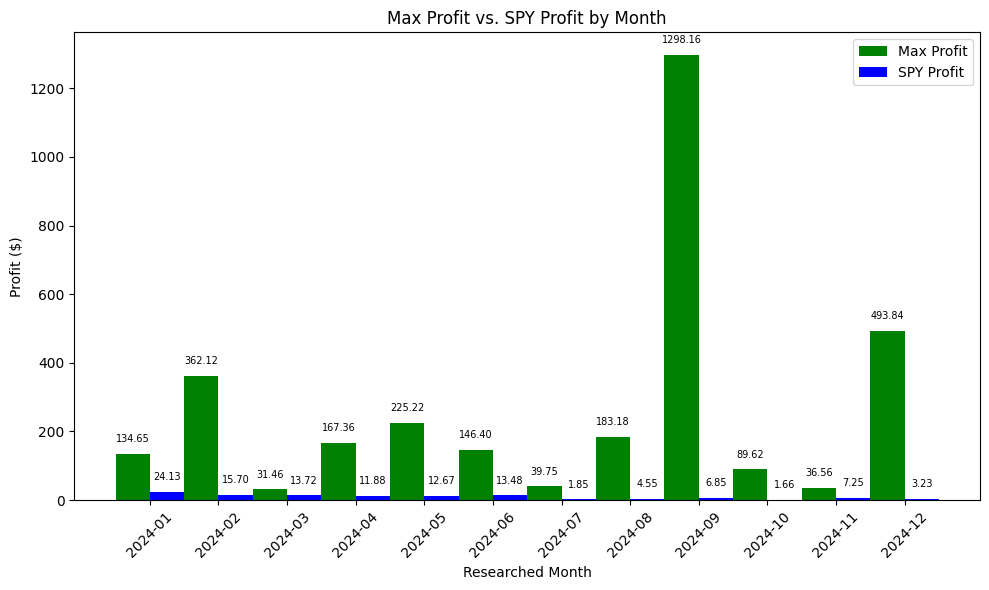

Detailed Data:
       Ticker Researched_Date  Lowest_Price Lowest_Date  Highest_Price  \
0       BETSF      2024-09-21        0.3600  2024-09-23        1.25000   
1        MIGI      2024-01-01        2.5000  2024-01-03        4.40000   
2        LMFA      2024-01-01        2.2020  2024-02-07        6.11100   
3         ICU      2024-01-08       12.0000  2024-01-12       42.92500   
4        UCAR      2024-01-17       10.6000  2024-01-19       13.50000   
5        LUNR      2024-02-26        3.1500  2024-08-05       19.62000   
6        SOUN      2024-02-26        3.5000  2024-04-22       24.98000   
7        AGEN      2024-02-26        4.7800  2024-04-18       19.69000   
8        WKHS      2024-03-04       72.5000  2024-03-05       85.50000   
9        AKBA      2024-03-15        1.5200  2024-03-15        2.48000   
10       XFOR      2024-03-28        1.3000  2024-03-28        1.60000   
11       GOEV      2024-03-28       64.6000  2024-03-28       78.60000   
12       EGOX      2024

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

class testerset:
    # --- Step 1: Load Original Data ---
    data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
    BETSF,2024-09-21,0.36000001,2024-09-23,1.25,2024-10-02,1.0,2024-10-09
    MIGI,2024-01-01,2.5,2024-01-03,4.4,2024-01-11,2.25,2024-01-18
    LMFA,2024-01-01,2.202,2024-02-07,6.111,2024-06-13,5.36,2024-06-20
    ICU,2024-01-08,12.0,2024-01-12,42.925,2024-02-22,18.35,2024-02-29
    UCAR,2024-01-17,10.6,2024-01-19,13.5,2024-01-22,11.0,2024-01-29
    LUNR,2024-02-26,3.15,2024-08-05,19.62,2024-12-27,18.16,2025-01-03
    SOUN,2024-02-26,3.5,2024-04-22,24.98,2024-12-26,19.84,2025-01-02
    AGEN,2024-02-26,4.78,2024-04-18,19.69,2024-06-04,16.78,2024-06-11
    WKHS,2024-03-04,72.5,2024-03-05,85.5,2024-03-11,62.25,2024-03-18
    AKBA,2024-03-15,1.52,2024-03-15,2.48,2024-03-28,1.51,2024-04-04
    XFOR,2024-03-28,1.3,2024-03-28,1.6,2024-04-03,1.22,2024-04-10
    GOEV,2024-03-28,64.6,2024-03-28,78.6,2024-04-01,48.2,2024-04-08
    EGOX,2024-04-03,0.025,2024-04-17,0.083999999,2024-04-19,0.0374,2024-04-26
    VNDA,2024-04-03,3.99,2024-04-16,6.75,2024-06-13,5.98,2024-06-20
    TVGN,2024-10-31,2.205,2024-10-31,2.635,2024-11-01,1.22,2024-11-08
    RANI,2024-04-12,4.428,2024-04-12,8.75,2024-04-17,6.99,2024-04-24
    FCUV,2024-04-29,1.5,2024-08-05,5.5,2024-12-27,3.50,2025-01-03
    RKLB,2024-05-02,3.655,2024-05-07,28.8,2024-12-26,24.96,2025-01-02
    GDHG,2024-05-02,15.3,2024-05-02,18.95,2024-05-03,13.25,2024-05-10
    LEXTF,2024-05-16,0.421,2024-06-13,1.217,2024-06-20,0.69999999,2024-06-27
    HOLO,2024-06-24,18.92,2024-06-24,24.2,2024-06-25,17.82,2024-07-02
    RONN,2024-06-05,0.0109,2024-06-05,0.0109,2024-06-05,0.0060000001,2024-06-11
    AEMD,2024-06-05,0.23999999,2024-08-05,1.06,2024-12-31,0.80,2025-01-03
    OPTT,2024-12-2,0.27000001,2024-12-17,1.37,2024-12-31,1.01,2025-01-07
    NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.13,2024-09-10
    CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,13.44,2024-10-14
    MYRUF,2024-07-31,0.185,2024-09-16,0.47915,2024-10-21,0.352,2024-10-28
    BURU,2024-08-02,3.02,2024-08-02,4.45,2024-08-05,1.82,2024-08-12
    BANT,2024-08-09,0.0027999999,2024-08-09,0.0044900002,2024-08-12,0.0031999999,2024-08-19
    RR,2024-08-16,0.51999998,2024-11-15,3.77,2024-12-30,2.41,2025-01-02
    CLOV,2024-09-03,2.455,2024-09-06,4.71,2024-10-17,3.79,2024-10-24
    LICY,2024-09-16,1.5005,2024-09-16,4.98,2024-11-08,2.05,2024-11-15
    MLGO,2024-09-21,3.8,2024-09-23,8.74,2024-10-10,6.04,2024-10-17
    MYNZ,2024-09-27,0.18000001,2024-12-02,7.95,2024-12-03,6.0,2024-12-10
    SPCB,2024-09-27,2.96,2024-10-18,8.14,2024-12-30,4.82,2025-01-06
    ELTP,2024-10-03,0.38999999,2024-10-07,0.75,2024-10-22,0.50999999,2024-10-29
    BBAI,2024-10-11,1.5,2024-10-11,5.2,2024-12-31,4.11,2025-01-02
    KULR,2024-12-19,2.06,2024-12-19,5.49,2024-12-27,4.14,2025-12-30
    AZI,2024-11-8,1.65,2024-11-08,3.2,2024-11-11,2.22,2024-11-18
    MJNA,2024-11-8,0.00069999997,2024-11-08,0.001,2024-11-11,0.00060000003,2024-11-18
    ZOM,2024-11-19,0.1237,2024-11-19,0.1354,2024-11-22,0.12800001,2024-11-29
    AKTS,2024-11-19,0.123,2024-11-19,0.123,2024-11-19,0.101,2024-11-29
    CTM,2024-12-2,0.215,2024-12-02,2.83,2024-12-30,2.00,2025-12-30
    WKSP,2024-12-09,7.8,2024-12-10,11.1,2024-12-13,8.35,2024-12-20
    RIME,2024-12-09,14.0,2024-12-16,34.0,2024-12-17,18.0,2024-12-24
    """
    
    # Read the CSV data into a DataFrame and parse date columns
    df = pd.read_csv(StringIO(data), parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date", "Day_After_Date"])
    
    # --- Step 2: Calculations for Each Stock ---
    # Calculate shares bought with a $25 investment
    df["Shares"] = 25 / df["Lowest_Price"]
    # The investment cost will always be $25 per instance
    df["Investment_Cost"] = df["Shares"] * df["Lowest_Price"]
    # Calculate the investment gain at the high price
    df["Investment_Gain"] = df["Shares"] * df["Highest_Price"]
    # Calculate the day-after investment gain (if you miss the high)
    df["Investment_Day_After_Gain"] = df["Shares"] * df["Day_After_Price"]
    
    # --- Step 3: Calculate Profit Metrics ---
    df["Max_Profit"] = df["Investment_Gain"] - df["Investment_Cost"]
    df["Day_After_Profit"] = df["Investment_Day_After_Gain"] - df["Investment_Cost"]
    df["Missed_Potential_Profit"] = df["Day_After_Profit"] - df["Max_Profit"]
    
    # Create a Researched_Month column (format YYYY-MM) from the Researched_Date
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')
    
    # --- Step 4: Group by Month Using Original Data ---
    # Since each stock investment is $25, the monthly Investment_Cost should equal (number of stocks)*25.
    monthly = df.groupby("Researched_Month").agg({
        "Investment_Cost": "sum",
        "Investment_Gain": "sum",
        "Investment_Day_After_Gain": "sum",
        "Max_Profit": "sum",
        "Day_After_Profit": "sum",
        "Missed_Potential_Profit": "sum"
    }).reset_index()
    print("Monthly aggregates computed from original data:")
    print(monthly[["Researched_Month", "Investment_Cost"]])
    # (For example, January will have 4 stocks so Investment_Cost = 4×25 = 100.)
    
    # --- Step 5: SPY Data and Comparison ---
    # SPY data is provided separately; here we load it and compute the SPY investment results.
    spy_data = """SPY,2024-10-1,573.40002,2024-10-01,586.080017,2024-12-31
    SPY,2024-12-1,571.32001,2024-11-01,586.080017,2024-12-31
    SPY,2024-11-1,567.89001,2024-11-04,609.070007,2024-12-06
    SPY,2024-09-3,560.46997,2024-09-03,586.080017,2024-12-31
    SPY,2024-08-1,552.57001,2024-08-01,586.080017,2024-12-31
    SPY,2024-07-1,545.63,2024-07-01,586.080017,2024-12-31
    SPY,2024-06-3,529.02002,2024-06-03,586.080017,2024-12-31
    SPY,2024-04-1,523.83002,2024-04-01,586.080017,2024-12-31
    SPY,2024-05-1,501.38,2024-05-01,586.080017,2024-12-31
    SPY,2024-03-1,515.38,2024-05-01,586.080017,2024-12-31
    SPY,2024-02-1,484.63,2024-02-01,586.080017,2024-12-31
    SPY,2024-01-2,472.16,2024-01-02,586.080017,2024-12-31"""
    
    spy_columns = ["Ticker", "Researched_Date", "Buy_Price", "Buy_Date", "Sell_Price", "Sell_Date"]
    spy_df = pd.read_csv(StringIO(spy_data), header=None, names=spy_columns,
                         parse_dates=["Researched_Date", "Buy_Date", "Sell_Date"])
    spy_df["Researched_Month"] = spy_df["Researched_Date"].dt.strftime('%Y-%m')
    spy_df = spy_df.sort_values(by="Researched_Date")
    
    # --- Merge the computed monthly data with SPY data (merge on Researched_Month) ---
    merged_df = pd.merge(monthly, spy_df, on="Researched_Month", how="left")
    
    # Calculate SPY shares and profit for each month
    merged_df["SPY_Shares"] = merged_df["Investment_Cost"] / merged_df["Buy_Price"]
    merged_df["SPY_Final_Value"] = merged_df["SPY_Shares"] * merged_df["Sell_Price"]
    merged_df["SPY_Profit"] = merged_df["SPY_Final_Value"] - merged_df["Investment_Cost"]
    
    print("Merged monthly data with SPY profit calculations:")
    print(merged_df[["Researched_Month", "Investment_Cost", "SPY_Profit"]])
    
    # --- Plotting Examples ---
    # Example: Bar graph comparing Max Profit vs. SPY Profit by month
    bar_width = 0.50
    x = range(len(merged_df["Researched_Month"]))
    plt.figure(figsize=(10, 6))
    bar_width = 0.50

    bars1 = plt.bar([p - bar_width/2 for p in x], merged_df["Max_Profit"], width=bar_width, label="Max Profit", color='green')
    bars2 = plt.bar([p + bar_width/2 for p in x], merged_df["SPY_Profit"], width=bar_width, label="SPY Profit", color='blue')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. SPY Profit by Month")
    plt.xticks(x, merged_df["Researched_Month"], rotation=45)
    plt.legend()
    
    for bar in bars1:
        bar_width = 0.50

        height = bar.get_height()
        offset = 7 if height >= 0 else -7
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center', va=va, fontsize=7)
    
    for bar in bars2:
        bar_width = 0.50

        height = bar.get_height()
        offset = 7 if height >= 0 else -7
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center', va=va, fontsize=7)
    
    plt.tight_layout()
    plt.show()
    
    # Optionally print detailed data and monthly aggregates
    print("Detailed Data:")
    print(df.head(99))
    print("\nMonthly Aggregates:")
    print(monthly)




0        69.444443
1        10.000000
2        11.353315
3         2.083333
4         2.358491
5         7.936508
6         7.142857
7         5.230126
8         0.344828
9        16.447368
10       19.230769
11        0.386997
12     1000.000000
13        6.265664
14       11.337868
15        5.645890
16       16.666667
17        6.839945
18        1.633987
19       59.382423
20        1.321353
21     2293.577982
22      104.166671
23       92.592589
24       44.045101
25        2.272727
26      135.135135
27        8.278146
28     8928.571747
29       48.076925
30       10.183299
31       16.661113
32        6.578947
33      138.888881
34        8.445946
35       64.102566
36       16.666667
37       12.135922
38       15.151515
39    35714.287245
40      202.101859
41      203.252033
42      116.279070
43        3.205128
44        1.785714
Name: Shares, dtype: float64
0       86.805553
1       44.000000
2       69.380109
3       89.427083
4       31.839623
5      155.714286
6      1

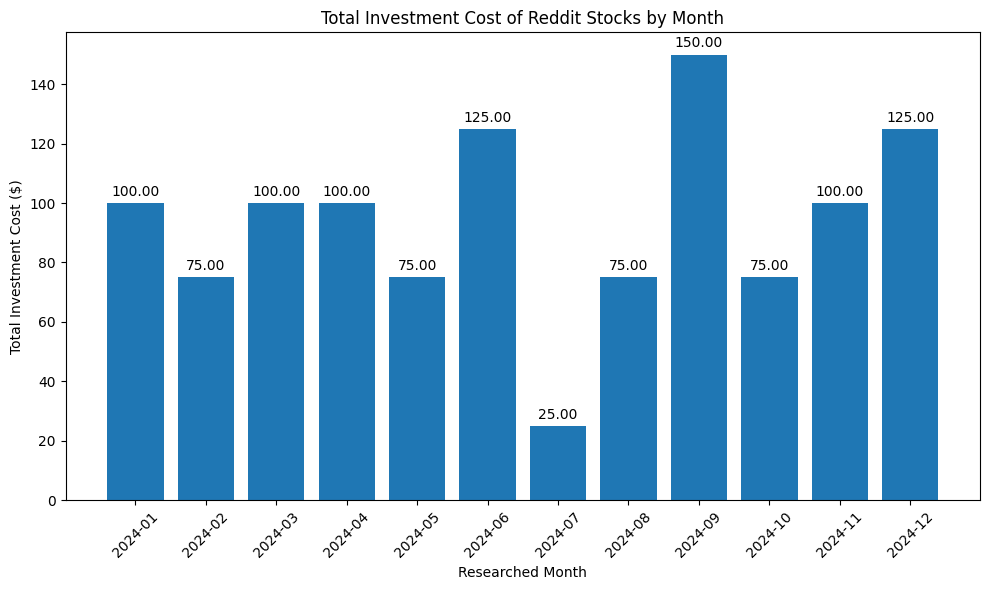

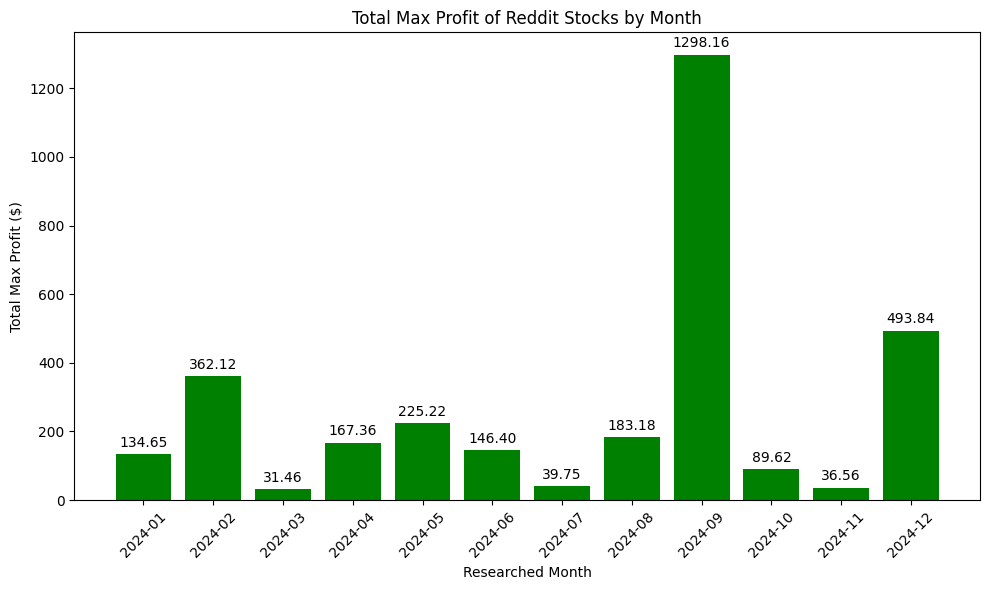

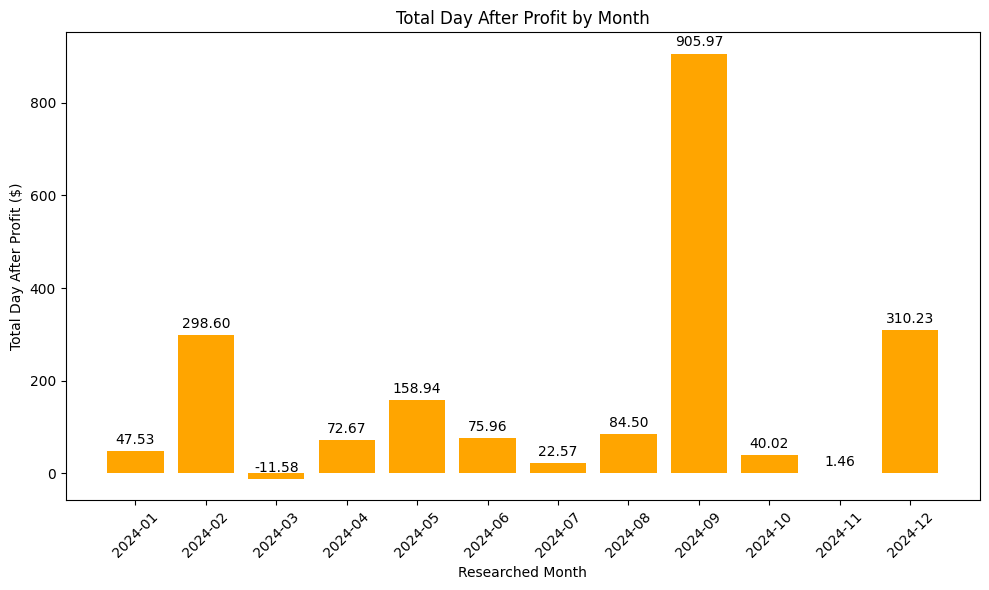

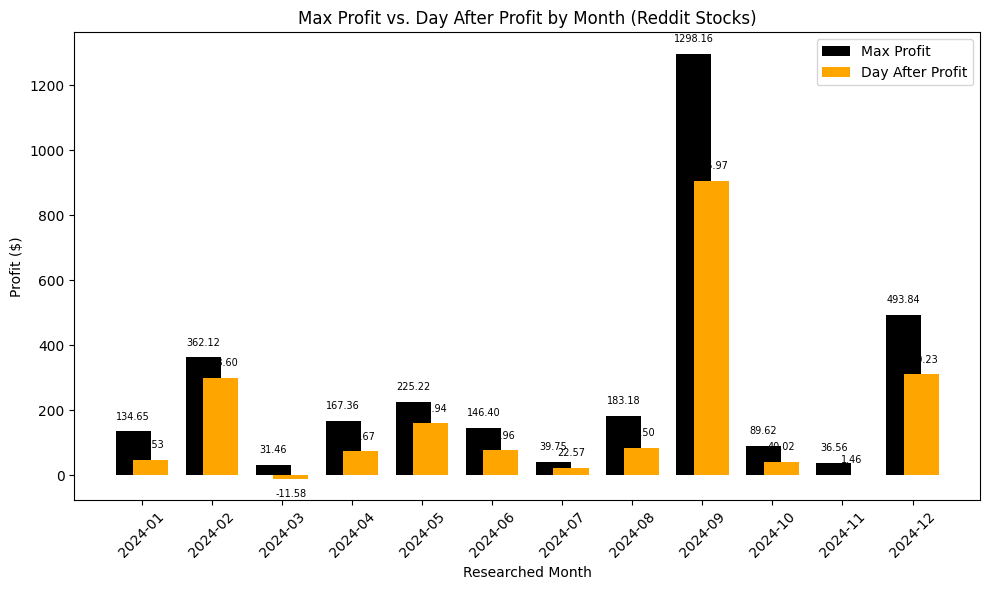

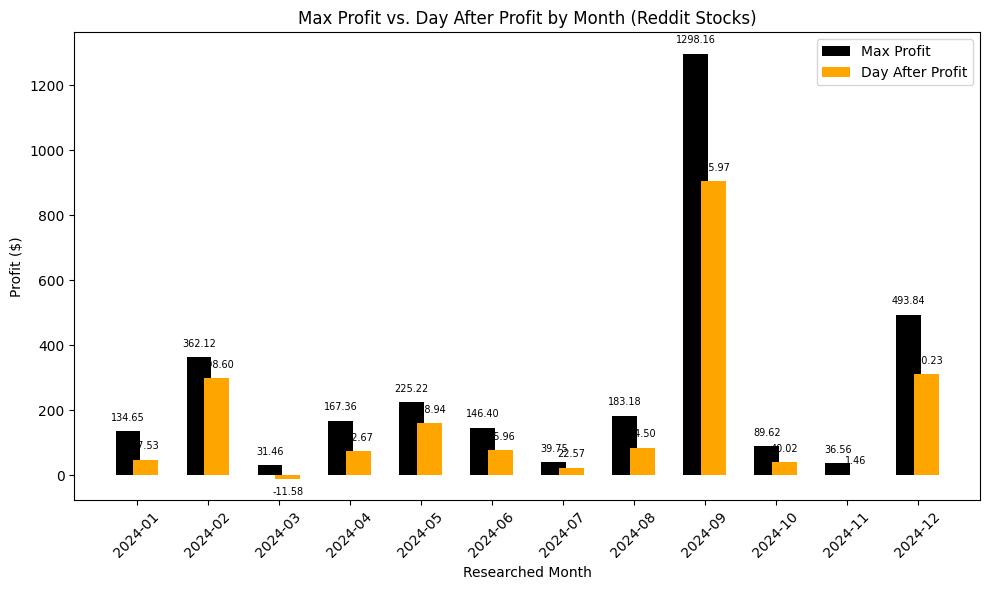

Detailed Data:
       Ticker Researched_Date  Lowest_Price Lowest_Date  Highest_Price  \
0       BETSF      2024-09-21        0.3600  2024-09-23        1.25000   
1        MIGI      2024-01-01        2.5000  2024-01-03        4.40000   
2        LMFA      2024-01-01        2.2020  2024-02-07        6.11100   
3         ICU      2024-01-08       12.0000  2024-01-12       42.92500   
4        UCAR      2024-01-17       10.6000  2024-01-19       13.50000   
5        LUNR      2024-02-26        3.1500  2024-08-05       19.62000   
6        SOUN      2024-02-26        3.5000  2024-04-22       24.98000   
7        AGEN      2024-02-26        4.7800  2024-04-18       19.69000   
8        WKHS      2024-03-04       72.5000  2024-03-05       85.50000   
9        AKBA      2024-03-15        1.5200  2024-03-15        2.48000   
10       XFOR      2024-03-28        1.3000  2024-03-28        1.60000   
11       GOEV      2024-03-28       64.6000  2024-03-28       78.60000   
12       EGOX      2024

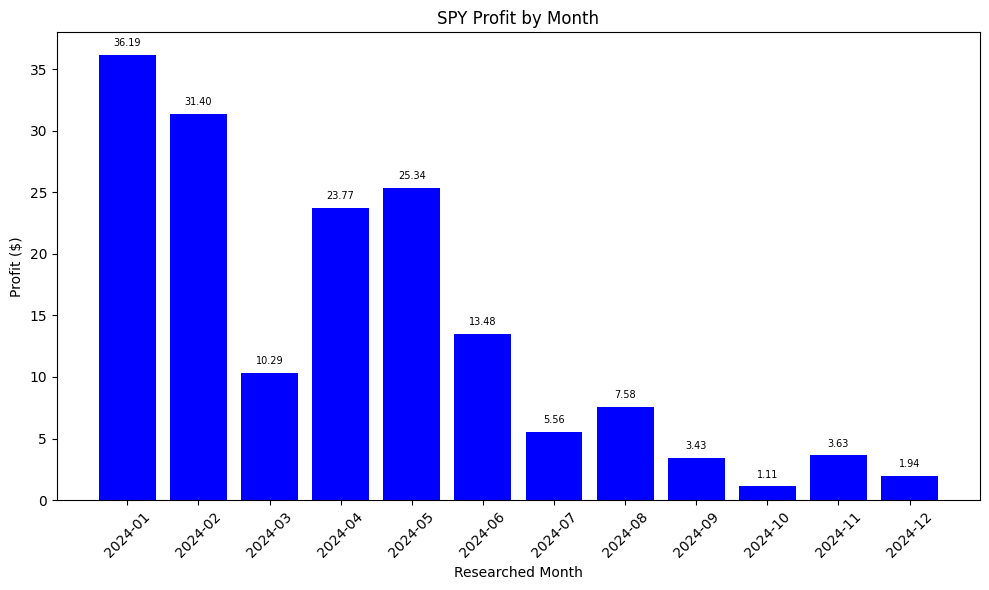

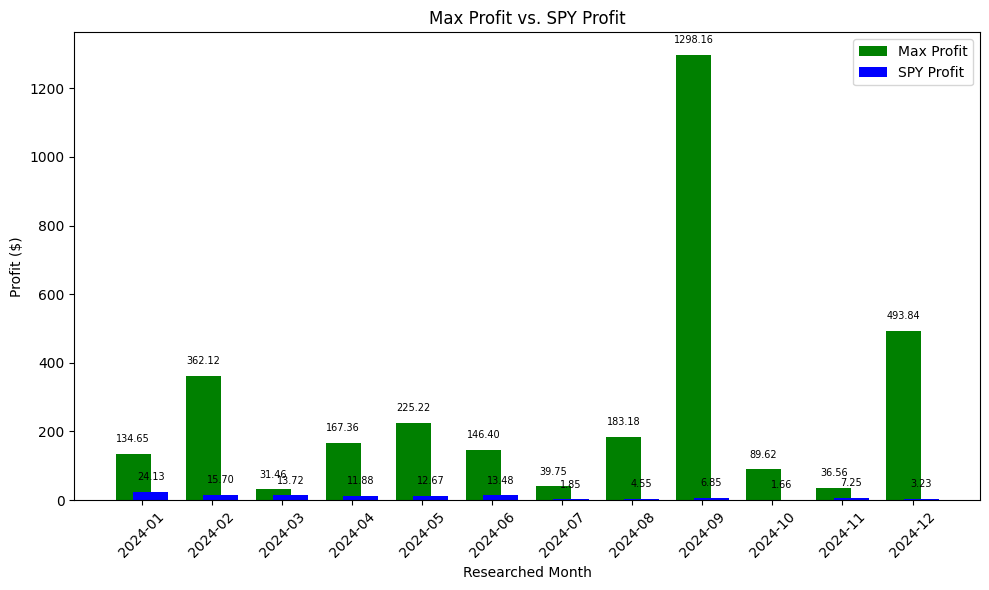

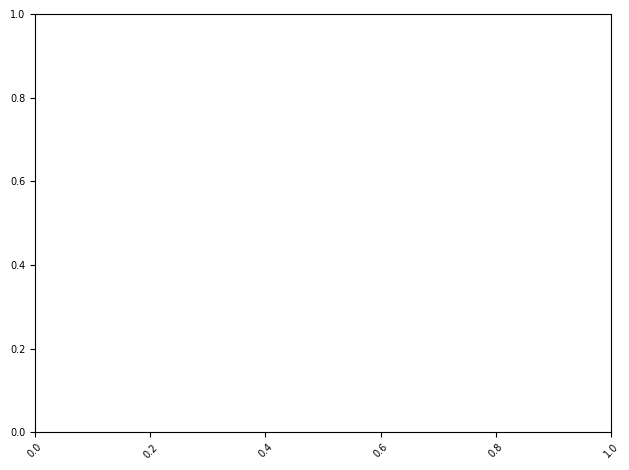

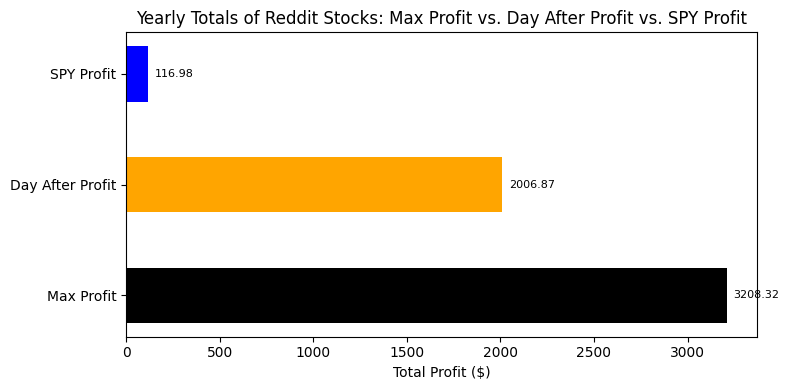

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

class testerset:
    # --- Step 1: Load New Data ---
    data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
    BETSF,2024-09-21,0.36000001,2024-09-23,1.25,2024-10-02,1.0,2024-10-09
    MIGI,2024-01-01,2.5,2024-01-03,4.4,2024-01-11,2.25,2024-01-18
    LMFA,2024-01-01,2.202,2024-02-07,6.111,2024-06-13,5.36,2024-06-20
    ICU,2024-01-08,12.0,2024-01-12,42.925,2024-02-22,18.35,2024-02-29
    UCAR,2024-01-17,10.6,2024-01-19,13.5,2024-01-22,11.0,2024-01-29
    LUNR,2024-02-26,3.15,2024-08-05,19.62,2024-12-27,18.16,2025-01-03
    SOUN,2024-02-26,3.5,2024-04-22,24.98,2024-12-26,19.84,2025-01-02
    AGEN,2024-02-26,4.78,2024-04-18,19.69,2024-06-04,16.78,2024-06-11
    WKHS,2024-03-04,72.5,2024-03-05,85.5,2024-03-11,62.25,2024-03-18
    AKBA,2024-03-15,1.52,2024-03-15,2.48,2024-03-28,1.51,2024-04-04
    XFOR,2024-03-28,1.3,2024-03-28,1.6,2024-04-03,1.22,2024-04-10
    GOEV,2024-03-28,64.6,2024-03-28,78.6,2024-04-01,48.2,2024-04-08
    EGOX,2024-04-03,0.025,2024-04-17,0.083999999,2024-04-19,0.0374,2024-04-26
    VNDA,2024-04-03,3.99,2024-04-16,6.75,2024-06-13,5.98,2024-06-20
    TVGN,2024-10-31,2.205,2024-10-31,2.635,2024-11-01,1.22,2024-11-08
    RANI,2024-04-12,4.428,2024-04-12,8.75,2024-04-17,6.99,2024-04-24
    FCUV,2024-04-29,1.5,2024-08-05,5.5,2024-12-27,3.50,2025-01-03
    RKLB,2024-05-02,3.655,2024-05-07,28.8,2024-12-26,24.96,2025-01-02
    GDHG,2024-05-02,15.3,2024-05-02,18.95,2024-05-03,13.25,2024-05-10
    LEXTF,2024-05-16,0.421,2024-06-13,1.217,2024-06-20,0.69999999,2024-06-27
    HOLO,2024-06-24,18.92,2024-06-24,24.2,2024-06-25,17.82,2024-07-02
    RONN,2024-06-05,0.0109,2024-06-05,0.0109,2024-06-05,0.0060000001,2024-06-11
    AEMD,2024-06-05,0.23999999,2024-08-05,1.06,2024-12-31,0.80,2025-01-03
    OPTT,2024-12-2,0.27000001,2024-12-17,1.37,2024-12-31,1.01,2025-01-07
    NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.13,2024-09-10
    CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,13.44,2024-10-14
    MYRUF,2024-07-31,0.185,2024-09-16,0.47915,2024-10-21,0.352,2024-10-28
    BURU,2024-08-02,3.02,2024-08-02,4.45,2024-08-05,1.82,2024-08-12
    BANT,2024-08-09,0.0027999999,2024-08-09,0.0044900002,2024-08-12,0.0031999999,2024-08-19
    RR,2024-08-16,0.51999998,2024-11-15,3.77,2024-12-30,2.41,2025-01-02
    CLOV,2024-09-03,2.455,2024-09-06,4.71,2024-10-17,3.79,2024-10-24
    LICY,2024-09-16,1.5005,2024-09-16,4.98,2024-11-08,2.05,2024-11-15
    MLGO,2024-09-21,3.8,2024-09-23,8.74,2024-10-10,6.04,2024-10-17
    MYNZ,2024-09-27,0.18000001,2024-12-02,7.95,2024-12-03,6.0,2024-12-10
    SPCB,2024-09-27,2.96,2024-10-18,8.14,2024-12-30,4.82,2025-01-06
    ELTP,2024-10-03,0.38999999,2024-10-07,0.75,2024-10-22,0.50999999,2024-10-29
    BBAI,2024-10-11,1.5,2024-10-11,5.2,2024-12-31,4.11,2025-01-02
    KULR,2024-12-19,2.06,2024-12-19,5.49,2024-12-27,4.14,2025-12-30
    AZI,2024-11-8,1.65,2024-11-08,3.2,2024-11-11,2.22,2024-11-18
    MJNA,2024-11-8,0.00069999997,2024-11-08,0.001,2024-11-11,0.00060000003,2024-11-18
    ZOM,2024-11-19,0.1237,2024-11-19,0.1354,2024-11-22,0.12800001,2024-11-29
    AKTS,2024-11-19,0.123,2024-11-19,0.123,2024-11-19,0.101,2024-11-29
    CTM,2024-12-2,0.215,2024-12-02,2.83,2024-12-30,2.00,2025-12-30
    WKSP,2024-12-09,7.8,2024-12-10,11.1,2024-12-13,8.35,2024-12-20
    RIME,2024-12-09,14.0,2024-12-16,34.0,2024-12-17,18.0,2024-12-24
    """
    
    # Read the CSV data into a DataFrame and parse date columns
    df = pd.read_csv(StringIO(data), 
                     parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date", "Day_After_Date"])
    
    # --- Step 2: Mapping & Calculations ---
    # Calculate the number of shares bought with a $25 investment
    df["Shares"] = 25 / df["Lowest_Price"]
    print(df["Shares"])
    # Investment cost (always $25 per stock)
    df["Investment_Cost"] = df["Shares"] * df["Lowest_Price"]
    # Investment gain if the high is hit
    df["Investment_Gain"] = df["Shares"] * df["Highest_Price"]
    # Investment gain if the day-after price is taken (i.e., if you miss the high)
    df["Investment_Day_After_Gain"] = df["Shares"] * df["Day_After_Price"]
    
    # --- Step 3: Calculate Profit Metrics ---
    df["Max_Profit"] = df["Investment_Gain"] - df["Investment_Cost"]
    print(df["Investment_Gain"])
    df["Day_After_Profit"] = df["Investment_Day_After_Gain"] - df["Investment_Cost"]
    df["Missed_Potential_Profit"] = df["Day_After_Profit"] - df["Max_Profit"]
    
    # Create a month column from Researched_Date for grouping (format YYYY-MM)
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')
    
    # --- Step 4: Group by Month ---
    monthly = df.groupby("Researched_Month").agg({
        "Investment_Cost": "sum",
        "Investment_Gain": "sum",
        "Investment_Day_After_Gain": "sum",
        "Max_Profit": "sum",
        "Day_After_Profit": "sum",
        "Missed_Potential_Profit": "sum"
    }).reset_index()
    
    # --- Step 5: Plotting Bar Graphs with Annotations ---
    
    # Graph 1: Total Investment Each Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Investment_Cost"])
    plt.title("Total Investment Cost of Reddit Stocks by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Investment Cost ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), 
                     textcoords="offset points",
                     ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    # Graph 2: Total Max Profit by Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Max_Profit"], color='green')
    plt.title("Total Max Profit of Reddit Stocks by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Max Profit ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), 
                     textcoords="offset points",
                     ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    # Graph 3: Total Day After Profit by Month
    plt.figure(figsize=(10, 6))
    bars = plt.bar(monthly["Researched_Month"], monthly["Day_After_Profit"], color='orange')
    plt.title("Total Day After Profit by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Total Day After Profit ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
   
# Graph 4: Comparison of Max Profit vs. Day After Profit per Month
    plt.figure(figsize=(10, 6))
    bar_width = 0.50
    x = range(len(monthly["Researched_Month"]))
    bars1 = plt.bar([p - bar_width/2 for p in x], monthly["Max_Profit"], width=bar_width, label="Max Profit", color='black')
    bars2 = plt.bar([p + bar_width/2 for p in x], monthly["Day_After_Profit"], width=bar_width, label="Day After Profit", color='orange')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. Day After Profit by Month (Reddit Stocks)")
    plt.xticks(x, monthly["Researched_Month"], rotation=45)
    plt.legend()
    for bar in bars1:
        height = bar.get_height()
        # If bar is positive, place text above; if negative, place below
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )

    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            offset = 7
            va = 'bottom'
        else:
            offset = -7
            va = 'top'
        
        plt.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, offset),
            textcoords="offset points",
            ha='center',
            va=va,
            fontsize=7
        )
    plt.tight_layout()
    plt.show()
# Graph 4: Comparison of Max Profit vs. Day After Profit per Month
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    x = range(len(monthly["Researched_Month"]))
    bars1 = plt.bar([p - bar_width/2 for p in x], monthly["Max_Profit"], width=bar_width, label="Max Profit", color='black')
    bars2 = plt.bar([p + bar_width/2 for p in x], monthly["Day_After_Profit"], width=bar_width, label="Day After Profit", color='orange')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. Day After Profit by Month (Reddit Stocks)")
    plt.xticks(x, monthly["Researched_Month"], rotation=45)
    plt.legend()
    for bar in bars1:
        height = bar.get_height()
        offset = 6 if height >= 0 else -6
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center', va=va, fontsize=7)
    for bar in bars2:
        height = bar.get_height()
        offset = 6 if height >= 0 else -6
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center', va=va, fontsize=7)
    plt.tight_layout()
    plt.show()
    
    # Display the detailed DataFrame and monthly aggregates (optional)
    print("Detailed Data:")
    print(df.head(99))
    print("\nMonthly Aggregates:")
    print(monthly)
    
    # --- Additional Steps: Merge with Monthly Investment Data and SPY Data ---
    data_monthly = """Researched_Month,Investment_Cost,Investment_Gain
2024-01,150.0,1004.263092
2024-02,150.0,742.357217
2024-03,75.0,111.120814
2024-04,200.0,372.998722
2024-05,150.0,848.659594
2024-06,125.0,225.886928
2024-07,75.0,132.663948
2024-08,125.0,289.209029
2024-09,75.0,141.302686
2024-10,50.0,125.210196
2024-11,50.0,87.222222
2024-12,75.0,148.719585
"""
    monthly_df = pd.read_csv(StringIO(data_monthly), usecols=["Researched_Month", "Investment_Cost"])
    
    spy_data = """SPY,2024-10-1,573.40002,2024-10-01,586.080017,2024-12-31
SPY,2024-12-1,571.32001,2024-11-01,586.080017,2024-12-31
SPY,2024-11-1,567.89001,2024-11-04,609.070007,2024-12-06
SPY,2024-09-3,560.46997,2024-09-03,586.080017,2024-12-31
SPY,2024-08-1,552.57001,2024-08-01,586.080017,2024-12-31
SPY,2024-07-1,545.63,2024-07-01,586.080017,2024-12-31
SPY,2024-06-3,529.02002,2024-06-03,586.080017,2024-12-31
SPY,2024-04-1,523.83002,2024-04-01,586.080017,2024-12-31
SPY,2024-05-1,501.38,2024-05-01,586.080017,2024-12-31
SPY,2024-03-1,515.38,2024-05-01,586.080017,2024-12-31
SPY,2024-02-1,484.63,2024-02-01,586.080017,2024-12-31
SPY,2024-01-2,472.16,2024-01-02,586.080017,2024-12-31
"""
    spy_columns = ["Ticker", "Researched_Date", "Buy_Price", "Buy_Date", "Sell_Price", "Sell_Date"]
    spy_df = pd.read_csv(StringIO(spy_data), header=None, names=spy_columns,
                         parse_dates=["Researched_Date", "Buy_Date", "Sell_Date"])
    spy_df["Researched_Month"] = spy_df["Researched_Date"].dt.strftime('%Y-%m')
    spy_df = spy_df.sort_values(by="Researched_Date")
    
    merged_df = pd.merge(monthly_df, spy_df, on="Researched_Month", how="left")
    print(merged_df["Investment_Cost"])
    
    merged_df["SPY_Shares"] = merged_df["Investment_Cost"] / merged_df["Buy_Price"]
    merged_df["SPY_Final_Value"] = merged_df["SPY_Shares"] * merged_df["Sell_Price"]
    merged_df["SPY_Profit"] = merged_df["SPY_Final_Value"] - merged_df["Investment_Cost"]
    merged_df = merged_df.sort_values("Researched_Month")
    
    plt.figure(figsize=(10,6))
    bars = plt.bar(merged_df["Researched_Month"], merged_df["SPY_Profit"], color='blue')
    plt.title("SPY Profit by Month")
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.xticks(rotation=45)
    for bar in bars:
        height = bar.get_height()
        offset = 5 if height >= 0 else -5
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center',
                     va=va,
                     fontsize=7)
    plt.tight_layout()
    plt.show()
    
    monthly_with_profit = df.groupby("Researched_Month").agg({
        "Investment_Cost": "sum",
        "Investment_Gain": "sum"
    }).reset_index()
    monthly_with_profit["Max_Profit"] = monthly_with_profit["Investment_Gain"] - monthly_with_profit["Investment_Cost"]
    
    merged_df = pd.merge(monthly_with_profit, spy_df, on="Researched_Month", how="left")
    merged_df["SPY_Shares"] = merged_df["Investment_Cost"] / merged_df["Buy_Price"]
    merged_df["SPY_Final_Value"] = merged_df["SPY_Shares"] * merged_df["Sell_Price"]
    merged_df["SPY_Profit"] = merged_df["SPY_Final_Value"] - merged_df["Investment_Cost"]
    
    bar_width = 0.50
    x = range(len(merged_df["Researched_Month"]))
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar([p - bar_width/2 for p in x], merged_df["Max_Profit"], width=bar_width, label="Max Profit", color='green')
    bars2 = plt.bar([p + bar_width/2 for p in x], merged_df["SPY_Profit"], width=bar_width, label="SPY Profit", color='blue')
    plt.xlabel("Researched Month")
    plt.ylabel("Profit ($)")
    plt.title("Max Profit vs. SPY Profit")
    plt.xticks(x, merged_df["Researched_Month"], rotation=45)
    plt.legend()
    for bar in bars1:
        height = bar.get_height()
        offset = 7 if height >= 0 else -7
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center',
                     va=va,
                     fontsize=7)
    for bar in bars2:
        height = bar.get_height()
        offset = 7 if height >= 0 else -7
        va = 'bottom' if height >= 0 else 'top'
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, offset),
                     textcoords="offset points",
                     ha='center',
                     va=va,
                     fontsize=7)
    plt.tight_layout()
    plt.show()
    
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()
    plt.show()
    
    total_max_profit = monthly["Max_Profit"].sum()
    total_day_after_profit = monthly["Day_After_Profit"].sum()
    total_spy_profit = merged_df["SPY_Profit"].sum()
    
    categories = ["Max Profit", "Day After Profit", "SPY Profit"]
    values = [total_max_profit, total_day_after_profit, total_spy_profit]
    
    plt.figure(figsize=(8, 4))
    bars = plt.barh(range(len(categories)), values, height=0.5, color=['black', 'orange', 'blue'])
    plt.yticks(range(len(categories)), categories, fontsize=10)
    plt.xlabel("Total Profit ($)", fontsize=10)
    plt.title("Yearly Totals of Reddit Stocks: Max Profit vs. Day After Profit vs. SPY Profit", fontsize=12)
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y()
        height = bar.get_height()
        offset = 5 if width >= 0 else -5
        ha = 'left' if width >= 0 else 'right'
        plt.annotate(f'{width:.2f}',
                     xy=(width, y + height/2),
                     xytext=(offset, 0),
                     textcoords='offset points',
                     ha=ha,
                     va='center',
                     fontsize=8)
    plt.tight_layout()
    plt.show()

# To run the tests, create an instance of testerset:
if __name__ == "__main__":
    testerset()


Reddit Stock Totals:
{'Total Stocks': 45, 'Total Investment': 1125, 'Total Profit': np.float64(3208.317163983359)}

Nasdaq Stock Totals:
{'Total Stocks': 52, 'Total Investment': 1300, 'Total Profit': np.float64(2929.614033186397)}

SPY Totals:
{'Total Stocks': 12, 'Total Investment': 1200, 'Total Profit': np.float64(128.43543422421516)}


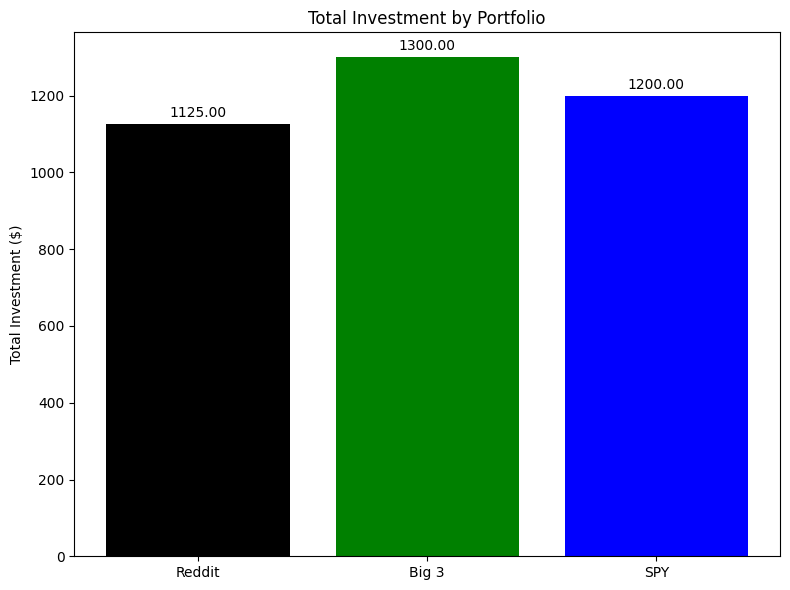

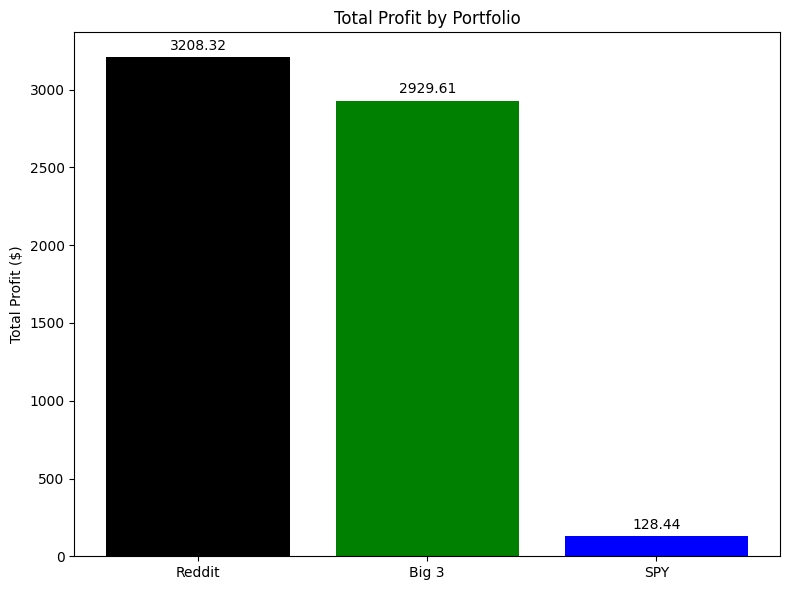

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- Define the datasets ---

reddit_data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
BETSF,2024-09-21,0.36000001,2024-09-23,1.25,2024-10-02,1.0,2024-10-09
MIGI,2024-01-01,2.5,2024-01-03,4.4,2024-01-11,2.25,2024-01-18
LMFA,2024-01-01,2.202,2024-02-07,6.111,2024-06-13,5.36,2024-06-20
ICU,2024-01-08,12.0,2024-01-12,42.925,2024-02-22,18.35,2024-02-29
UCAR,2024-01-17,10.6,2024-01-19,13.5,2024-01-22,11.0,2024-01-29
LUNR,2024-02-26,3.15,2024-08-05,19.62,2024-12-27,18.16,2025-01-03
SOUN,2024-02-26,3.5,2024-04-22,24.98,2024-12-26,19.84,2025-01-02
AGEN,2024-02-26,4.78,2024-04-18,19.69,2024-06-04,16.78,2024-06-11
WKHS,2024-03-04,72.5,2024-03-05,85.5,2024-03-11,62.25,2024-03-18
AKBA,2024-03-15,1.52,2024-03-15,2.48,2024-03-28,1.51,2024-04-04
XFOR,2024-03-28,1.3,2024-03-28,1.6,2024-04-03,1.22,2024-04-10
GOEV,2024-03-28,64.6,2024-03-28,78.6,2024-04-01,48.2,2024-04-08
EGOX,2024-04-03,0.025,2024-04-17,0.083999999,2024-04-19,0.0374,2024-04-26
VNDA,2024-04-03,3.99,2024-04-16,6.75,2024-06-13,5.98,2024-06-20
TVGN,2024-10-31,2.205,2024-10-31,2.635,2024-11-01,1.22,2024-11-08
RANI,2024-04-12,4.428,2024-04-12,8.75,2024-04-17,6.99,2024-04-24
FCUV,2024-04-29,1.5,2024-08-05,5.5,2024-12-27,3.50,2025-01-03
RKLB,2024-05-02,3.655,2024-05-07,28.8,2024-12-26,24.96,2025-01-02
GDHG,2024-05-02,15.3,2024-05-02,18.95,2024-05-03,13.25,2024-05-10
LEXTF,2024-05-16,0.421,2024-06-13,1.217,2024-06-20,0.69999999,2024-06-27
HOLO,2024-06-24,18.92,2024-06-24,24.2,2024-06-25,17.82,2024-07-02
RONN,2024-06-05,0.0109,2024-06-05,0.0109,2024-06-05,0.0060000001,2024-06-11
AEMD,2024-06-05,0.23999999,2024-08-05,1.06,2024-12-31,0.80,2025-01-03
OPTT,2024-12-2,0.27000001,2024-12-17,1.37,2024-12-31,1.01,2025-01-07
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.13,2024-09-10
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,13.44,2024-10-14
MYRUF,2024-07-31,0.185,2024-09-16,0.47915,2024-10-21,0.352,2024-10-28
BURU,2024-08-02,3.02,2024-08-02,4.45,2024-08-05,1.82,2024-08-12
BANT,2024-08-09,0.0027999999,2024-08-09,0.0044900002,2024-08-12,0.0031999999,2024-08-19
RR,2024-08-16,0.51999998,2024-11-15,3.77,2024-12-30,2.41,2025-01-02
CLOV,2024-09-03,2.455,2024-09-06,4.71,2024-10-17,3.79,2024-10-24
LICY,2024-09-16,1.5005,2024-09-16,4.98,2024-11-08,2.05,2024-11-15
MLGO,2024-09-21,3.8,2024-09-23,8.74,2024-10-10,6.04,2024-10-17
MYNZ,2024-09-27,0.18000001,2024-12-02,7.95,2024-12-03,6.0,2024-12-10
SPCB,2024-09-27,2.96,2024-10-18,8.14,2024-12-30,4.82,2025-01-06
ELTP,2024-10-03,0.38999999,2024-10-07,0.75,2024-10-22,0.50999999,2024-10-29
BBAI,2024-10-11,1.5,2024-10-11,5.2,2024-12-31,4.11,2025-01-02
KULR,2024-12-19,2.06,2024-12-19,5.49,2024-12-27,4.14,2025-12-30
AZI,2024-11-8,1.65,2024-11-08,3.2,2024-11-11,2.22,2024-11-18
MJNA,2024-11-8,0.00069999997,2024-11-08,0.001,2024-11-11,0.00060000003,2024-11-18
ZOM,2024-11-19,0.1237,2024-11-19,0.1354,2024-11-22,0.12800001,2024-11-29
AKTS,2024-11-19,0.123,2024-11-19,0.123,2024-11-19,0.101,2024-11-29
CTM,2024-12-2,0.215,2024-12-02,2.83,2024-12-30,2.00,2025-12-30
WKSP,2024-12-09,7.8,2024-12-10,11.1,2024-12-13,8.35,2024-12-20
RIME,2024-12-09,14.0,2024-12-16,34.0,2024-12-17,18.0,2024-12-24
"""
nasdaq_data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
XTKG,2024-01-26,0.096000001,2024-11-01,2.9,2024-11-14,0.127,2024-11-15
BDSX,2024-01-26,1.955,2024-01-26,2.21,2024-02-05,2.02,2024-02-06
VTGN,2024-01-26,3.91,2024-03-14,5.74,2024-04-04,5.04,2024-04-05
FOXO,2024-02-23,0.13,2024-10-31,1.3,2024-11-12,0.92000002,2024-11-13
HIMX,2024-02-23,4.8,2024-04-19,9.8,2024-12-12,8.59,2024-12-13
BBAI,2024-02-23,1.165,2024-08-05,5.2,2024-12-31,4.52,2025-01-02
BFRG,2024-02-23,3.81,2024-02-23,5.52,2024-02-27,4.645,2024-02-28
PRZO,2024-02-23,0.49000001,2024-08-21,3.16,2024-12-27,2.44,2024-12-30
ARBE,2024-03-18,1.76,2024-03-20,2.57,2024-03-22,2.19,2024-03-26
AEP,2024-03-18,79.16,2024-04-16,105.18,2024-09-16,104.21,2024-09-17
WISE,2024-03-18,24.56,2024-08-05,40.669,2024-12-26,39.77,2024-12-27
EVC,2024-04-28,1.73,2024-08-14,2.73,2024-12-18,2.46,2024-12-19
GLGI,2024-04-28,0.99000001,2024-05-15,1.86,2024-08-29,1.57,2024-08-30
IAUX,2024-04-28,1.14,2024-05-14,1.44,2024-05-20,1.22,2024-05-21
LAC,2024-04-28,2.02,2024-08-05,5.2,2024-10-29,4.11,2024-10-30
NAT,2024-04-28,3.85,2024-05-01,4.4,2024-05-21,4.28,2024-05-22
NGD,2024-05-15,1.8,2024-05-15,3.25,2024-09-25,3.11,2024-09-26
MULN,2024-11-14,220.8,2024-11-14,220.8,2024-11-14,152.4,2024-11-15
TMC,2024-05-15,1.27,2024-07-02,1.62,2024-07-08,1.49,2024-07-09
TLRY,2024-05-15,2.03,2024-05-15,2.23,2024-05-16,1.98,2024-05-17
CRON,2024-06-17,2.21,2024-07-05,2.54,2024-07-23,2.37,2024-07-24
ENTX,2024-06-17,1.41,2024-08-05,2.45,2024-12-10,2.24,2024-12-11
BLDE,2024-06-17,2.6,2024-08-05,5.17,2024-11-29,4.46,2024-12-02
ADIL,2024-07-25,0.89999998,2024-08-05,1.3,2024-12-04,1.15,2024-12-05
APDN,2024-08-20,57.0,2024-08-21,177.0,2024-08-23,110.00,2024-08-26
GTEC,2024-08-20,1.86,2024-08-29,2.937,2024-09-13,2.77,2024-09-16
ZCAR,2024-08-20,284.0,2024-08-22,340.0,2024-08-23,315.00,2024-08-26
SMSI,2024-09-18,0.66000003,2024-12-05,1.67,2024-12-27,1.39,2024-12-30
DTSS,2024-09-18,1.9,2024-09-24,3.0,2024-11-19,2.52,2024-11-20
IMRX,2024-09-18,2.275,2024-09-19,3.51,2024-09-20,2.87,2024-09-21
TVGN,2024-10-15,0.86000001,2024-10-15,3.09,2024-10-25,2.74,2024-10-28
RANI,2024-10-15,1.30,2024-12-19,1.84,2025-02-14,1.73,2025-02-15
CERO,2024-11-14,18.0,2024-11-14,44.8,2024-11-15,23.97,2024-11-18
OPTX,2024-12-19,1.86,2024-12-20,4.51,2024-12-27,2.52,2024-12-31
SIDU,2024-12-19,3.885,2024-12-20,6.75,2024-12-31,3.05,2025-01-02
TNXP,2024-12-19,40.30,2024-12-19,72.0,2024-12-19,54.30,2024-12-20
GRUSF,2024-01-27,0.30000001,2024-01-31,0.89999998,2024-04-30,0.70999998,2024-05-01
MDXXF,2024-01-27,0.12,2024-01-31,0.34999999,2024-02-05,0.235,2024-02-06
APEUF,2024-01-27,0.85000002,2024-02-06,1.23,2024-04-22,1.2,2024-04-23
LEXTF,2024-02-26,0.23,2024-03-28,1.217,2024-06-20,0.69099998,2024-06-21
OILFF,2024-04-18,0.076499999,2024-05-14,0.12,2024-05-29,0.094300002,2024-05-30
WHLR,2024-04-18,1058.40002,2024-06-11,3038.3999,2024-06-13,2016.0,2024-06-14
BIRMF,2024-04-18,1.15,2024-04-18,2.35,2024-12-26,2.32,2024-12-27
KULR,2024-05-16,0.2,2024-08-13,5.49,2024-12-27,3.55,2024-12-30
JAGX,2024-05-16,86.25,2024-06-03,104.50,2024-06-22,40.50,2024-06-23
MUSLF,2024-05-16,0.1855,2024-05-16,0.205,2024-05-17,0.01923,2024-05-20
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.39,2024-09-04
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,14.31,2024-10-08
RAMP,2024-07-4,30.91,2024-07-10,33.47,2024-07-16,32.16,2024-07-17
MYRUF,2024-07-4,0.1724,2024-07-08,0.47915,2024-10-21,0.39750001,2024-10-22
E,2024-08-8,30.91,2024-08-08,33.12,2024-08-26,32.75,2024-08-27
NCI,2024-08-8,0.38999999,2024-09-05,1.8,2024-10-21,0.884,2024-10-22"""

spy_data = """SPY,2024-10-1,573.40002,2024-10-01,586.080017,2024-12-31
SPY,2024-12-1,571.32001,2024-11-01,586.080017,2024-12-31
SPY,2024-11-1,567.89001,2024-11-04,609.070007,2024-12-06
SPY,2024-09-3,560.46997,2024-09-03,586.080017,2024-12-31
SPY,2024-08-1,552.57001,2024-08-01,586.080017,2024-12-31
SPY,2024-07-1,545.63,2024-07-01,586.080017,2024-12-31
SPY,2024-06-3,529.02002,2024-06-03,586.080017,2024-12-31
SPY,2024-04-1,523.83002,2024-04-01,586.080017,2024-12-31
SPY,2024-05-1,501.38,2024-05-01,586.080017,2024-12-31
SPY,2024-03-1,515.38,2024-05-01,586.080017,2024-12-31
SPY,2024-02-1,484.63,2024-02-01,586.080017,2024-12-31
SPY,2024-01-2,472.16,2024-01-02,586.080017,2024-12-31"""

# --- Function to process stock data (Reddit or Nasdaq) ---
def process_stock_data(data_str):
    df = pd.read_csv(StringIO(data_str),
                     parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date", "Day_After_Date"])
    # For stocks, investment is $25 per instance.
    df["Shares"] = 25 / df["Lowest_Price"]
    df["Investment_Cost"] = 25
    df["Investment_Gain"] = df["Shares"] * df["Highest_Price"]
    df["Investment_Day_After_Gain"] = df["Shares"] * df["Day_After_Price"]
    df["Max_Profit"] = df["Investment_Gain"] - df["Investment_Cost"]
    df["Day_After_Profit"] = df["Investment_Day_After_Gain"] - df["Investment_Cost"]
    df["Missed_Potential_Profit"] = df["Day_After_Profit"] - df["Max_Profit"]
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')
    return df

# --- Function to process SPY data with a monthly investment of $200 ---
def process_spy_data(data_str, investment=200):
    spy_cols = ["Ticker", "Researched_Date", "Buy_Price", "Buy_Date", "Sell_Price", "Sell_Date"]
    df = pd.read_csv(StringIO(data_str), header=None, names=spy_cols,
                     parse_dates=["Researched_Date", "Buy_Date", "Sell_Date"])
    df["Investment_Cost"] = investment
    df["SPY_Shares"] = investment / df["Buy_Price"]
    df["SPY_Final_Value"] = df["SPY_Shares"] * df["Sell_Price"]
    df["Profit"] = df["SPY_Final_Value"] - df["Investment_Cost"]
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')
    return df

# Process each dataset
reddit_df = process_stock_data(reddit_data)
nasdaq_df = process_stock_data(nasdaq_data)
spy_df = process_spy_data(spy_data, investment=100)

# --- Compute overall totals for each portfolio ---
def compute_overall_totals(df, profit_col, cost_per_stock):
    totals = {
        "Total Stocks": len(df),
        "Total Investment": len(df) * cost_per_stock,
        "Total Profit": df[profit_col].sum()
    }
    return totals

reddit_totals = compute_overall_totals(reddit_df, "Max_Profit", 25)
nasdaq_totals = compute_overall_totals(nasdaq_df, "Max_Profit", 25)
spy_totals = {
    "Total Stocks": len(spy_df),
    "Total Investment": len(spy_df) * 100,
    "Total Profit": spy_df["Profit"].sum()
}

print("Reddit Stock Totals:")
print(reddit_totals)
print("\nNasdaq Stock Totals:")
print(nasdaq_totals)
print("\nSPY Totals:")
print(spy_totals)

# --- Comparison Plot: Total Investment ---
portfolios = ["Reddit", "Big 3", "SPY"]
investment_values = [reddit_totals["Total Investment"],
                     nasdaq_totals["Total Investment"],
                     spy_totals["Total Investment"]]

plt.figure(figsize=(8,6))
bars = plt.bar(portfolios, investment_values, color=['black', 'green', 'blue'])
plt.ylabel("Total Investment ($)")
plt.title("Total Investment by Portfolio")
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x()+bar.get_width()/2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# --- Comparison Plot: Total Profit ---
profit_values = [reddit_totals["Total Profit"],
                 nasdaq_totals["Total Profit"],
                 spy_totals["Total Profit"]]

plt.figure(figsize=(8,6))
bars = plt.bar(portfolios, profit_values, color=['black', 'green', 'blue'])
plt.ylabel("Total Profit ($)")
plt.title("Total Profit by Portfolio")
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x()+bar.get_width()/2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


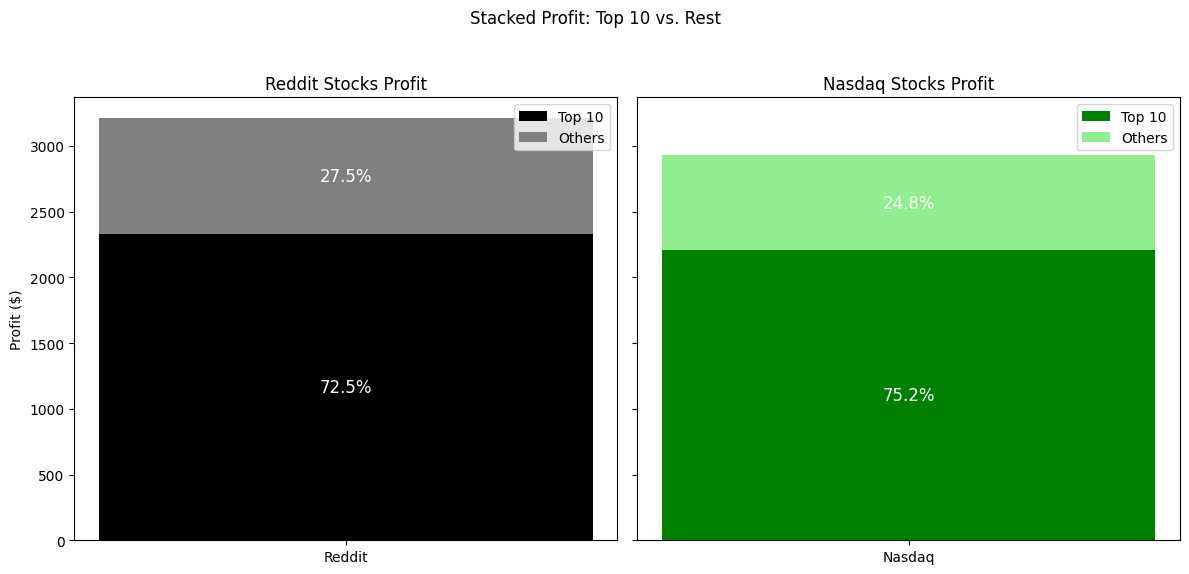

Most Profitable Reddit Stocks (by Max Profit):
   Ticker    Max_Profit
0    MYNZ  1.079167e+03
1     CTM  3.040698e+02
2    RKLB  1.719904e+02
3      RR  1.562500e+02
4    SOUN  1.534286e+02
5    LUNR  1.307143e+02
6    OPTT  1.018518e+02
7    AEMD  8.541667e+01
8    AGEN  7.798117e+01
9    FCUV  6.666667e+01
10    ICU  6.442708e+01
11  BETSF  6.180555e+01
12   BBAI  6.166667e+01
13   EGOX  5.900000e+01
14   LICY  5.797234e+01
15  LEXTF  4.726841e+01
16   LMFA  4.438011e+01
17   SPCB  4.375000e+01
18  NYWKF  4.238901e+01
19   KULR  4.162621e+01
20  MYRUF  3.975000e+01
21   RIME  3.571429e+01
22   MLGO  3.250000e+01
23   RANI  2.440154e+01
24    AZI  2.348485e+01
25   ELTP  2.307692e+01
26   CLOV  2.296334e+01
27   MIGI  1.900000e+01
28   VNDA  1.729323e+01
29   AKBA  1.578947e+01
30   BANT  1.508929e+01
31   BURU  1.183775e+01
32    CAF  1.161364e+01
33   MJNA  1.071429e+01
34   WKSP  1.057692e+01
35   HOLO  6.976744e+00
36   UCAR  6.839623e+00
37   GDHG  5.964052e+00
38   XFOR  5.7692

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
nasdaq_data ="""Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
XTKG,2024-01-26,0.096000001,2024-11-01,2.9,2024-11-14,0.127,2024-11-15
BDSX,2024-01-26,1.955,2024-01-26,2.21,2024-02-05,2.02,2024-02-06
VTGN,2024-01-26,3.91,2024-03-14,5.74,2024-04-04,5.04,2024-04-05
FOXO,2024-02-23,0.13,2024-10-31,1.3,2024-11-12,0.92000002,2024-11-13
HIMX,2024-02-23,4.8,2024-04-19,9.8,2024-12-12,8.59,2024-12-13
BBAI,2024-02-23,1.165,2024-08-05,5.2,2024-12-31,4.52,2025-01-02
BFRG,2024-02-23,3.81,2024-02-23,5.52,2024-02-27,4.645,2024-02-28
PRZO,2024-02-23,0.49000001,2024-08-21,3.16,2024-12-27,2.44,2024-12-30
ARBE,2024-03-18,1.76,2024-03-20,2.57,2024-03-22,2.19,2024-03-26
AEP,2024-03-18,79.16,2024-04-16,105.18,2024-09-16,104.21,2024-09-17
WISE,2024-03-18,24.56,2024-08-05,40.669,2024-12-26,39.77,2024-12-27
EVC,2024-04-28,1.73,2024-08-14,2.73,2024-12-18,2.46,2024-12-19
GLGI,2024-04-28,0.99000001,2024-05-15,1.86,2024-08-29,1.57,2024-08-30
IAUX,2024-04-28,1.14,2024-05-14,1.44,2024-05-20,1.22,2024-05-21
LAC,2024-04-28,2.02,2024-08-05,5.2,2024-10-29,4.11,2024-10-30
NAT,2024-04-28,3.85,2024-05-01,4.4,2024-05-21,4.28,2024-05-22
NGD,2024-05-15,1.8,2024-05-15,3.25,2024-09-25,3.11,2024-09-26
MULN,2024-11-14,220.8,2024-11-14,220.8,2024-11-14,152.4,2024-11-15
TMC,2024-05-15,1.27,2024-07-02,1.62,2024-07-08,1.49,2024-07-09
TLRY,2024-05-15,2.03,2024-05-15,2.23,2024-05-16,1.98,2024-05-17
CRON,2024-06-17,2.21,2024-07-05,2.54,2024-07-23,2.37,2024-07-24
ENTX,2024-06-17,1.41,2024-08-05,2.45,2024-12-10,2.24,2024-12-11
BLDE,2024-06-17,2.6,2024-08-05,5.17,2024-11-29,4.46,2024-12-02
ADIL,2024-07-25,0.89999998,2024-08-05,1.3,2024-12-04,1.15,2024-12-05
APDN,2024-08-20,57.0,2024-08-21,177.0,2024-08-23,110.00,2024-08-26
GTEC,2024-08-20,1.86,2024-08-29,2.937,2024-09-13,2.77,2024-09-16
ZCAR,2024-08-20,284.0,2024-08-22,340.0,2024-08-23,315.00,2024-08-26
SMSI,2024-09-18,0.66000003,2024-12-05,1.67,2024-12-27,1.39,2024-12-30
DTSS,2024-09-18,1.9,2024-09-24,3.0,2024-11-19,2.52,2024-11-20
IMRX,2024-09-18,2.275,2024-09-19,3.51,2024-09-20,2.87,2024-09-21
TVGN,2024-10-15,0.86000001,2024-10-15,3.09,2024-10-25,2.74,2024-10-28
RANI,2024-10-15,1.30,2024-12-19,1.84,2025-02-14,1.73,2025-02-15
CERO,2024-11-14,18.0,2024-11-14,44.8,2024-11-15,23.97,2024-11-18
OPTX,2024-12-19,1.86,2024-12-20,4.51,2024-12-27,2.52,2024-12-31
SIDU,2024-12-19,3.885,2024-12-20,6.75,2024-12-31,3.05,2025-01-02
TNXP,2024-12-19,40.30,2024-12-19,72.0,2024-12-19,54.30,2024-12-20
GRUSF,2024-01-27,0.30000001,2024-01-31,0.89999998,2024-04-30,0.70999998,2024-05-01
MDXXF,2024-01-27,0.12,2024-01-31,0.34999999,2024-02-05,0.235,2024-02-06
APEUF,2024-01-27,0.85000002,2024-02-06,1.23,2024-04-22,1.2,2024-04-23
LEXTF,2024-02-26,0.23,2024-03-28,1.217,2024-06-20,0.69099998,2024-06-21
OILFF,2024-04-18,0.076499999,2024-05-14,0.12,2024-05-29,0.094300002,2024-05-30
WHLR,2024-04-18,1058.40002,2024-06-11,3038.3999,2024-06-13,2016.0,2024-06-14
BIRMF,2024-04-18,1.15,2024-04-18,2.35,2024-12-26,2.32,2024-12-27
KULR,2024-05-16,0.2,2024-08-13,5.49,2024-12-27,3.55,2024-12-30
JAGX,2024-05-16,86.25,2024-06-03,104.50,2024-06-22,40.50,2024-06-23
MUSLF,2024-05-16,0.1855,2024-05-16,0.205,2024-05-17,0.01923,2024-05-20
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.39,2024-09-04
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,14.31,2024-10-08
RAMP,2024-07-4,30.91,2024-07-10,33.47,2024-07-16,32.16,2024-07-17
MYRUF,2024-07-4,0.1724,2024-07-08,0.47915,2024-10-21,0.39750001,2024-10-22
E,2024-08-8,30.91,2024-08-08,33.12,2024-08-26,32.75,2024-08-27
NCI,2024-08-8,0.38999999,2024-09-05,1.8,2024-10-21,0.884,2024-10-22

"""
# --- Define the dataset (use one dataset; you can substitute this for either Reddit or Nasdaq) ---
reddit_data = """Ticker,Researched_Date,Lowest_Price,Lowest_Date,Highest_Price,Highest_Date,Day_After_Price,Day_After_Date
BETSF,2024-09-21,0.36000001,2024-09-23,1.25,2024-10-02,1.0,2024-10-09
MIGI,2024-01-01,2.5,2024-01-03,4.4,2024-01-11,2.25,2024-01-18
LMFA,2024-01-01,2.202,2024-02-07,6.111,2024-06-13,5.36,2024-06-20
ICU,2024-01-08,12.0,2024-01-12,42.925,2024-02-22,18.35,2024-02-29
UCAR,2024-01-17,10.6,2024-01-19,13.5,2024-01-22,11.0,2024-01-29
LUNR,2024-02-26,3.15,2024-08-05,19.62,2024-12-27,18.16,2025-01-03
SOUN,2024-02-26,3.5,2024-04-22,24.98,2024-12-26,19.84,2025-01-02
AGEN,2024-02-26,4.78,2024-04-18,19.69,2024-06-04,16.78,2024-06-11
WKHS,2024-03-04,72.5,2024-03-05,85.5,2024-03-11,62.25,2024-03-18
AKBA,2024-03-15,1.52,2024-03-15,2.48,2024-03-28,1.51,2024-04-04
XFOR,2024-03-28,1.3,2024-03-28,1.6,2024-04-03,1.22,2024-04-10
GOEV,2024-03-28,64.6,2024-03-28,78.6,2024-04-01,48.2,2024-04-08
EGOX,2024-04-03,0.025,2024-04-17,0.083999999,2024-04-19,0.0374,2024-04-26
VNDA,2024-04-03,3.99,2024-04-16,6.75,2024-06-13,5.98,2024-06-20
TVGN,2024-10-31,2.205,2024-10-31,2.635,2024-11-01,1.22,2024-11-08
RANI,2024-04-12,4.428,2024-04-12,8.75,2024-04-17,6.99,2024-04-24
FCUV,2024-04-29,1.5,2024-08-05,5.5,2024-12-27,3.50,2025-01-03
RKLB,2024-05-02,3.655,2024-05-07,28.8,2024-12-26,24.96,2025-01-02
GDHG,2024-05-02,15.3,2024-05-02,18.95,2024-05-03,13.25,2024-05-10
LEXTF,2024-05-16,0.421,2024-06-13,1.217,2024-06-20,0.69999999,2024-06-27
HOLO,2024-06-24,18.92,2024-06-24,24.2,2024-06-25,17.82,2024-07-02
RONN,2024-06-05,0.0109,2024-06-05,0.0109,2024-06-05,0.0060000001,2024-06-11
AEMD,2024-06-05,0.23999999,2024-08-05,1.06,2024-12-31,0.80,2025-01-03
OPTT,2024-12-2,0.27000001,2024-12-17,1.37,2024-12-31,1.01,2025-01-07
NYWKF,2024-06-6,0.56760001,2024-07-26,1.53,2024-09-03,1.13,2024-09-10
CAF,2024-06-6,11.0,2024-08-05,16.11,2024-10-07,13.44,2024-10-14
MYRUF,2024-07-31,0.185,2024-09-16,0.47915,2024-10-21,0.352,2024-10-28
BURU,2024-08-02,3.02,2024-08-02,4.45,2024-08-05,1.82,2024-08-12
BANT,2024-08-09,0.0027999999,2024-08-09,0.0044900002,2024-08-12,0.0031999999,2024-08-19
RR,2024-08-16,0.51999998,2024-11-15,3.77,2024-12-30,2.41,2025-01-02
CLOV,2024-09-03,2.455,2024-09-06,4.71,2024-10-17,3.79,2024-10-24
LICY,2024-09-16,1.5005,2024-09-16,4.98,2024-11-08,2.05,2024-11-15
MLGO,2024-09-21,3.8,2024-09-23,8.74,2024-10-10,6.04,2024-10-17
MYNZ,2024-09-27,0.18000001,2024-12-02,7.95,2024-12-03,6.0,2024-12-10
SPCB,2024-09-27,2.96,2024-10-18,8.14,2024-12-30,4.82,2025-01-06
ELTP,2024-10-03,0.38999999,2024-10-07,0.75,2024-10-22,0.50999999,2024-10-29
BBAI,2024-10-11,1.5,2024-10-11,5.2,2024-12-31,4.11,2025-01-02
KULR,2024-12-19,2.06,2024-12-19,5.49,2024-12-27,4.14,2025-12-30
AZI,2024-11-8,1.65,2024-11-08,3.2,2024-11-11,2.22,2024-11-18
MJNA,2024-11-8,0.00069999997,2024-11-08,0.001,2024-11-11,0.00060000003,2024-11-18
ZOM,2024-11-19,0.1237,2024-11-19,0.1354,2024-11-22,0.12800001,2024-11-29
AKTS,2024-11-19,0.123,2024-11-19,0.123,2024-11-19,0.101,2024-11-29
CTM,2024-12-2,0.215,2024-12-02,2.83,2024-12-30,2.00,2025-12-30
WKSP,2024-12-09,7.8,2024-12-10,11.1,2024-12-13,8.35,2024-12-20
RIME,2024-12-09,14.0,2024-12-16,34.0,2024-12-17,18.0,2024-12-24
"""

# --- Function to process stock data (for Reddit or Nasdaq) ---
def process_stock_data(data_str):
    df = pd.read_csv(StringIO(data_str),
                     parse_dates=["Researched_Date", "Lowest_Date", "Highest_Date", "Day_After_Date"])
    # For each stock, assume a $25 investment.
    df["Shares"] = 25 / df["Lowest_Price"]
    df["Investment_Cost"] = 25
    df["Investment_Gain"] = df["Shares"] * df["Highest_Price"]
    df["Max_Profit"] = df["Investment_Gain"] - df["Investment_Cost"]
    df["Researched_Month"] = df["Researched_Date"].dt.strftime('%Y-%m')
    return df

# --- Process the Reddit and Nasdaq datasets ---
reddit_df = process_stock_data(reddit_data)
nasdaq_df = process_stock_data(nasdaq_data)

# --- Determine the most profitable stocks after a $25 investment ---
# Sort each DataFrame by "Max_Profit" in descending order.
reddit_sorted = reddit_df.sort_values(by="Max_Profit", ascending=False)
nasdaq_sorted = nasdaq_df.sort_values(by="Max_Profit", ascending=False)

# --- Compute total profit for each dataset ---
total_profit_reddit = reddit_df["Max_Profit"].sum()
total_profit_nasdaq = nasdaq_df["Max_Profit"].sum()

# --- Prepare data for a stacked bar chart for each portfolio ---
# For Reddit:
reddit_top10 = reddit_sorted.head(10)["Max_Profit"].sum()
reddit_rest = reddit_sorted.iloc[10:]["Max_Profit"].sum()
reddit_total = reddit_top10 + reddit_rest
reddit_pct_top10 = reddit_top10 / reddit_total * 100
reddit_pct_rest = reddit_rest / reddit_total * 100

# For Nasdaq:
nasdaq_top10 = nasdaq_sorted.head(10)["Max_Profit"].sum()
nasdaq_rest = nasdaq_sorted.iloc[10:]["Max_Profit"].sum()
nasdaq_total = nasdaq_top10 + nasdaq_rest
nasdaq_pct_top10 = nasdaq_top10 / nasdaq_total * 100
nasdaq_pct_rest = nasdaq_rest / nasdaq_total * 100

# --- Create Stacked Bar Graphs with Percentages ---
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# Reddit Stacked Bar
axes[0].bar("Reddit", reddit_top10, label="Top 10", color="black")
axes[0].bar("Reddit", reddit_rest, bottom=reddit_top10, label="Others", color="grey")
axes[0].set_title("Reddit Stocks Profit")
axes[0].set_ylabel("Profit ($)")
# Annotate percentages on the Reddit bar
axes[0].text(0, reddit_top10/2, f"{reddit_pct_top10:.1f}%", ha="center", va="center", color="white", fontsize=12)
axes[0].text(0, reddit_top10 + reddit_rest/2, f"{reddit_pct_rest:.1f}%", ha="center", va="center", color="white", fontsize=12)
axes[0].legend()

# Nasdaq Stacked Bar
axes[1].bar("Nasdaq", nasdaq_top10, label="Top 10", color="green")
axes[1].bar("Nasdaq", nasdaq_rest, bottom=nasdaq_top10, label="Others", color="lightgreen")
axes[1].set_title("Nasdaq Stocks Profit")
# Annotate percentages on the Nasdaq bar
axes[1].text(0, nasdaq_top10/2, f"{nasdaq_pct_top10:.1f}%", ha="center", va="center", color="white", fontsize=12)
axes[1].text(0, nasdaq_top10 + nasdaq_rest/2, f"{nasdaq_pct_rest:.1f}%", ha="center", va="center", color="white", fontsize=12)
axes[1].legend()

plt.suptitle("Stacked Profit: Top 10 vs. Rest")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Print Summary ---
print("Most Profitable Reddit Stocks (by Max Profit):")
print(reddit_sorted[["Ticker", "Max_Profit"]].reset_index(drop=True))
print("\nTotal Profit for Reddit Stocks: ${:.2f}".format(total_profit_reddit))

print("\nMost Profitable Nasdaq Stocks (by Max Profit):")
print(nasdaq_sorted[["Ticker", "Max_Profit"]].reset_index(drop=True))
print("\nTotal Profit for Nasdaq Stocks: ${:.2f}".format(total_profit_nasdaq))


In [8]:
import pandas as pd
import argparse
import sys

# Set up command-line argument parsing with defaults.
parser = argparse.ArgumentParser(description="Compare ticker columns in two CSV files.")
parser.add_argument("--dead_stock", default="dead_stock.csv", help="Path to the first CSV file")
parser.add_argument("--reddit_stock", default="reddit_stock.csv", help="Path to the second CSV file")

# If running in an interactive environment (like a Jupyter notebook), use empty list to avoid errors.
if hasattr(sys, 'ps1'):
    args = parser.parse_args([])
else:
    args = parser.parse_args()

# Load both CSV files into DataFrames.
df1 = pd.read_csv(args.dead_stock)
df2 = pd.read_csv(args.reddit_stock)

# Check that the "Ticker" column exists in both DataFrames.
if "Ticker" not in df1.columns or "Ticker" not in df2.columns:
    raise ValueError("One or both CSV files do not have a 'Ticker' column.")

# Extract the Ticker columns and convert them to sets.
tickers1 = set(df1["Ticker"])
tickers2 = set(df2["Ticker"])

# Find the intersection (common tickers).
common_tickers = tickers1.intersection(tickers2)

# Print the common tickers.
print("Common Tickers:")
for ticker in sorted(common_tickers):
    print(ticker)


Common Tickers:
BBAI
CAF
KULR
LEXTF
MYRUF
NYWKF
RANI
TVGN


Stock	Reddit Profit	Big 3 Profit
BBAI	61.67	        86.59
CAF	    11.61	        11.61
KULR	41.63	        661.25
LEXTF	47.27	        107.28
MYRUF	39.75	        44.48
NYWKF	42.39	        42.39
RANI	24.40	        10.38
TVGN	4.88	        64.83
Total   273.60          1028.81